# **Predicción de Planes de Pensiones usando Modelos de Clasificación**


---






## 1. Importación de Librerías

En esta sección importamos todas las librerías necesarias para la manipulación de datos, visualización, y la implementación de los modelos de clasificación.

In [ ]:
#para gestionar los datos
import pandas as pd
import numpy as np

#para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Para dividir dataset entre  teain y test
from sklearn.model_selection import train_test_split

# Para escalar y normalizar las características
from sklearn.preprocessing import StandardScaler

#modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Metricas y evaluacion
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

## 2. Conexión a la Fuente de Datos e Importación

Aquí conectamos Google Drive para acceder a los datasets necesarios y los cargamos en dataframes para su análisis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
customers =pd.read_csv("/content/drive/MyDrive/Estudios/4.Master en Data Science /TFM/ML/customers.csv")
products =pd.read_csv("/content/drive/MyDrive/Estudios/4.Master en Data Science /TFM/ML/products.csv")
sales =pd.read_csv("/content/drive/MyDrive/Estudios/4.Master en Data Science /TFM/ML/sales.csv")

## 3. Exploración de Datos (EDA)

Realizamos una exploración inicial de los datos para entender su estructura, tamaño, y tipos de variables.

In [ ]:
print(customers.shape, products.shape, sales.shape)


(151493, 25) (13, 3) (238574, 5)


In [ ]:
print(customers.head(),'\n','\n', products.head(),'\n','\n', sales.head())

   customer_id country_id  region_code gender  age    salary entry_date  \
0        15891         ES         28.0      H   59       NaN    2022-07   
1        16203         ES          8.0      V   70       NaN    2022-12   
2        16502         ES         28.0      H   58       NaN    2022-09   
3        17457         ES         28.0      H   53  25601.44    2021-09   
4        17970         ES         28.0      V   75       NaN    2019-04   

  entry_channel  active_customer            segment  ...  long_term_deposit  \
0           KAT              1.0                NaN  ...                  0   
1           KAT              1.0  02 - PARTICULARES  ...                  0   
2           KHN              1.0  02 - PARTICULARES  ...                  0   
3           KAT              1.0  02 - PARTICULARES  ...                  1   
4           KAT              1.0  02 - PARTICULARES  ...                  0   

   em_account_pp  credit_card  payroll  pension_plan  payroll_account  \
0

In [ ]:
print(customers.info(), '\n','\n', products.info(),'\n','\n', sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151493 entries, 0 to 151492
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         151493 non-null  int64  
 1   country_id          151493 non-null  object 
 2   region_code         151444 non-null  float64
 3   gender              151491 non-null  object 
 4   age                 151493 non-null  int64  
 5   salary              77194 non-null   float64
 6   entry_date          151493 non-null  object 
 7   entry_channel       89108 non-null   object 
 8   active_customer     151493 non-null  float64
 9   segment             88867 non-null   object 
 10  short_term_deposit  151493 non-null  int64  
 11  loans               151493 non-null  int64  
 12  mortgage            151493 non-null  int64  
 13  funds               151493 non-null  int64  
 14  securities          151493 non-null  int64  
 15  long_term_deposit   151493 non-nul

## 4. Preparación de Datos

Unimos los datasets de clientes y ventas, y filtramos la información relevante para crear un dataset que será utilizado para el entrenamiento del modelo.

### Definid DF: df_last_pension

In [ ]:
# Unir tablas clientes y ventas
df_merged = pd.merge(customers, sales, on='customer_id', how='left')

df_merged.head()

customer_id country_id  region_code gender  age    salary entry_date  \
0        15891         ES         28.0      H   59       NaN    2022-07   
1        16203         ES          8.0      V   70       NaN    2022-12   
2        16502         ES         28.0      H   58       NaN    2022-09   
3        16502         ES         28.0      H   58       NaN    2022-09   
4        17457         ES         28.0      H   53  25601.44    2021-09   

  entry_channel  active_customer            segment  ...  pension_plan  \
0           KAT              1.0                NaN  ...             0   
1           KAT              1.0  02 - PARTICULARES  ...             0   
2           KHN              1.0  02 - PARTICULARES  ...             0   
3           KHN              1.0  02 - PARTICULARES  ...             0   
4           KAT              1.0  02 - PARTICULARES  ...             0   

   payroll_account  emc_account  debit_card  em_account_p  em_acount  sale_id  \
0                0            0           0             0          1   130004   
1                0            0           0             0          1   130005   
2                0            1           0             0          1    78841   
3                0            1           0             0          1   130006   
4                0            0           1             0          1    91164   

   month_sale  product_id  net_margin  
0     2022-07        4657      16.600  
1     2023-01        4657      24.175  
2     2023-01        8871      17.150  
3     2022-10        4657      16.075  
4     2022-09        3819      14.000  

[5 rows x 29 columns]

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238574 entries, 0 to 238573
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         238574 non-null  int64  
 1   country_id          238574 non-null  object 
 2   region_code         238495 non-null  float64
 3   gender              238571 non-null  object 
 4   age                 238574 non-null  int64  
 5   salary              130966 non-null  float64
 6   entry_date          238574 non-null  object 
 7   entry_channel       175135 non-null  object 
 8   active_customer     238574 non-null  float64
 9   segment             174874 non-null  object 
 10  short_term_deposit  238574 non-null  int64  
 11  loans               238574 non-null  int64  
 12  mortgage            238574 non-null  int64  
 13  funds               238574 non-null  int64  
 14  securities          238574 non-null  int64  
 15  long_term_deposit   238574 non-nul

In [ ]:
# Ordenar por customer_id y luego por month_sale para asegurarnos de identificar la última compra.
df_merged_sorted = df_merged.sort_values(by=['customer_id', 'month_sale'])
df_merged_sorted.head()

customer_id country_id  region_code gender  age    salary entry_date  \
0        15891         ES         28.0      H   59       NaN    2022-07   
1        16203         ES          8.0      V   70       NaN    2022-12   
3        16502         ES         28.0      H   58       NaN    2022-09   
2        16502         ES         28.0      H   58       NaN    2022-09   
4        17457         ES         28.0      H   53  25601.44    2021-09   

  entry_channel  active_customer            segment  ...  pension_plan  \
0           KAT              1.0                NaN  ...             0   
1           KAT              1.0  02 - PARTICULARES  ...             0   
3           KHN              1.0  02 - PARTICULARES  ...             0   
2           KHN              1.0  02 - PARTICULARES  ...             0   
4           KAT              1.0  02 - PARTICULARES  ...             0   

   payroll_account  emc_account  debit_card  em_account_p  em_acount  sale_id  \
0                0            0           0             0          1   130004   
1                0            0           0             0          1   130005   
3                0            1           0             0          1   130006   
2                0            1           0             0          1    78841   
4                0            0           1             0          1    91164   

   month_sale  product_id  net_margin  
0     2022-07        4657      16.600  
1     2023-01        4657      24.175  
3     2022-10        4657      16.075  
2     2023-01        8871      17.150  
4     2022-09        3819      14.000  

[5 rows x 29 columns]

In [ ]:
df_merged_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238574 entries, 0 to 238573
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         238574 non-null  int64  
 1   country_id          238574 non-null  object 
 2   region_code         238495 non-null  float64
 3   gender              238571 non-null  object 
 4   age                 238574 non-null  int64  
 5   salary              130966 non-null  float64
 6   entry_date          238574 non-null  object 
 7   entry_channel       175135 non-null  object 
 8   active_customer     238574 non-null  float64
 9   segment             174874 non-null  object 
 10  short_term_deposit  238574 non-null  int64  
 11  loans               238574 non-null  int64  
 12  mortgage            238574 non-null  int64  
 13  funds               238574 non-null  int64  
 14  securities          238574 non-null  int64  
 15  long_term_deposit   238574 non-null  in

In [ ]:
#  Filtrar la última compra de cada cliente, ya que partimos de la idea de que los datos de customers son actualizados a la última compra
df_last = df_merged_sorted.groupby('customer_id').tail(1)
df_last.head()


customer_id country_id  region_code gender  age    salary entry_date  \
0        15891         ES         28.0      H   59       NaN    2022-07   
1        16203         ES          8.0      V   70       NaN    2022-12   
2        16502         ES         28.0      H   58       NaN    2022-09   
4        17457         ES         28.0      H   53  25601.44    2021-09   
5        17970         ES         28.0      V   75       NaN    2019-04   

  entry_channel  active_customer            segment  ...  pension_plan  \
0           KAT              1.0                NaN  ...             0   
1           KAT              1.0  02 - PARTICULARES  ...             0   
2           KHN              1.0  02 - PARTICULARES  ...             0   
4           KAT              1.0  02 - PARTICULARES  ...             0   
5           KAT              1.0  02 - PARTICULARES  ...             1   

   payroll_account  emc_account  debit_card  em_account_p  em_acount  sale_id  \
0                0            0           0             0          1   130004   
1                0            0           0             0          1   130005   
2                0            1           0             0          1    78841   
4                0            0           1             0          1    91164   
5                1            1           1             0          0    12022   

   month_sale  product_id  net_margin  
0     2022-07        4657      16.600  
1     2023-01        4657      24.175  
2     2023-01        8871      17.150  
4     2022-09        3819      14.000  
5     2023-02        2673     207.575  

[5 rows x 29 columns]

In [ ]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151493 entries, 0 to 238573
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         151493 non-null  int64  
 1   country_id          151493 non-null  object 
 2   region_code         151444 non-null  float64
 3   gender              151491 non-null  object 
 4   age                 151493 non-null  int64  
 5   salary              77194 non-null   float64
 6   entry_date          151493 non-null  object 
 7   entry_channel       89108 non-null   object 
 8   active_customer     151493 non-null  float64
 9   segment             88867 non-null   object 
 10  short_term_deposit  151493 non-null  int64  
 11  loans               151493 non-null  int64  
 12  mortgage            151493 non-null  int64  
 13  funds               151493 non-null  int64  
 14  securities          151493 non-null  int64  
 15  long_term_deposit   151493 non-null  in

In [ ]:
# Filtrar solo aquellos donde la última compra es 'product_id' = 1364 (pension_plan). Asi sabemos como eran quienes compraron este producto.

df_last_pension = df_last[df_last['product_id'] == 1364]
df_last_pension.head()


customer_id country_id  region_code gender  age    salary entry_date  \
153        62943         ES         28.0      H   48  37631.30    2020-12   
180        74455         ES         28.0      H   47  27809.62    2020-01   
244       104152         ES         28.0      V   53  56555.02    2022-07   
263       113436         ES         28.0      V   65  57761.07    2020-02   
292       120000         ES         35.0      V   47  26671.94    2021-06   

    entry_channel  active_customer            segment  ...  pension_plan  \
153           KAT              1.0  02 - PARTICULARES  ...             1   
180           KAT              1.0  02 - PARTICULARES  ...             1   
244           KAT              1.0  02 - PARTICULARES  ...             1   
263           KAT              1.0  02 - PARTICULARES  ...             1   
292           013              1.0  02 - PARTICULARES  ...             1   

     payroll_account  emc_account  debit_card  em_account_p  em_acount  \
153                1            0           1             0          0   
180                1            0           1             0          0   
244                1            0           0             0          0   
263                1            0           1             0          0   
292                1            0           0             0          0   

     sale_id  month_sale  product_id  net_margin  
153    41370     2022-06        1364    1229.050  
180    41372     2022-02        1364     989.175  
244    41375     2023-04        1364     875.100  
263    41376     2022-06        1364    1229.075  
292    41378     2022-02        1364    1813.800  

[5 rows x 29 columns]

In [ ]:
df_last_pension.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2718 entries, 153 to 236719
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         2718 non-null   int64  
 1   country_id          2718 non-null   object 
 2   region_code         2716 non-null   float64
 3   gender              2718 non-null   object 
 4   age                 2718 non-null   int64  
 5   salary              2105 non-null   float64
 6   entry_date          2718 non-null   object 
 7   entry_channel       2716 non-null   object 
 8   active_customer     2718 non-null   float64
 9   segment             2716 non-null   object 
 10  short_term_deposit  2718 non-null   int64  
 11  loans               2718 non-null   int64  
 12  mortgage            2718 non-null   int64  
 13  funds               2718 non-null   int64  
 14  securities          2718 non-null   int64  
 15  long_term_deposit   2718 non-null   int64  
 16  em_acco

In [ ]:
df_last_pension['pension_plan'].value_counts()

pension_plan
1    2718
Name: count, dtype: int64

### Definir DF: df_last_no_pension

In [ ]:
# Filtrar aquellos que no tienen 'pension_plan' y elegir al azar una muestra de 3000 para el modelo

df_last_no = df_last[df_last['pension_plan'] == 0]
df_last_no_pension = df_last_no.sample(n=3000, random_state=42)
df_last_no_pension.head(10)

customer_id country_id  region_code gender  age    salary entry_date  \
11002       1044274         ES          3.0      H   24  38282.37    2019-08   
142016      1435856         ES         28.0      H   22  27412.15    2022-08   
120419      1411253         ES          8.0      V   25  27843.33    2022-07   
6457        1013612         ES         26.0      V   52       NaN    2019-12   
130872      1423256         ES          8.0      V   21  40469.34    2022-07   
194362      1496455         ES         20.0      H   37       NaN    2022-11   
202378      1506335         ES         43.0      H   20       NaN    2022-11   
72994       1362914         ES         50.0      V   21  19472.92    2021-11   
22732       1121585         ES         41.0      H   25  24463.09    2020-02   
113103      1404211         ES         28.0      V   38  43523.65    2022-07   

       entry_channel  active_customer             segment  ...  pension_plan  \
11002            KHE              1.0  03 - UNIVERSITARIO  ...             0   
142016           KHO              1.0  03 - UNIVERSITARIO  ...             0   
120419           NaN              0.0                 NaN  ...             0   
6457             KAT              1.0   02 - PARTICULARES  ...             0   
130872           KHQ              0.0  03 - UNIVERSITARIO  ...             0   
194362           NaN              0.0                 NaN  ...             0   
202378           NaN              0.0                 NaN  ...             0   
72994            RED              0.0  03 - UNIVERSITARIO  ...             0   
22732            KFC              1.0  03 - UNIVERSITARIO  ...             0   
113103           NaN              1.0                 NaN  ...             0   

        payroll_account  emc_account  debit_card  em_account_p  em_acount  \
11002                 0            0           1             0          1   
142016                1            0           0             0          0   
120419                0            0           0             0          1   
6457                  0            0           0             0          1   
130872                0            0           0             0          1   
194362                0            0           0             0          1   
202378                0            0           0             0          1   
72994                 0            0           1             0          0   
22732                 0            0           1             0          1   
113103                0            0           0             0          1   

        sale_id  month_sale  product_id  net_margin  
11002     93533     2023-05        3819      14.000  
142016    74349     2022-11        2235      18.475  
120419   161347     2022-07        4657      18.550  
6457      11237     2022-06        1119     267.675  
130872   170351     2022-08        4657      19.400  
194362   219458     2022-11        4657      18.975  
202378   225177     2022-11        4657      16.250  
72994    110583     2023-04        3819      14.500  
22732     96680     2023-03        3819      15.000  
113103   156290     2022-07        4657      17.825  

[10 rows x 29 columns]

In [ ]:
df_last_no_pension.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 11002 to 170652
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         3000 non-null   int64  
 1   country_id          3000 non-null   object 
 2   region_code         3000 non-null   float64
 3   gender              3000 non-null   object 
 4   age                 3000 non-null   int64  
 5   salary              1466 non-null   float64
 6   entry_date          3000 non-null   object 
 7   entry_channel       1617 non-null   object 
 8   active_customer     3000 non-null   float64
 9   segment             1611 non-null   object 
 10  short_term_deposit  3000 non-null   int64  
 11  loans               3000 non-null   int64  
 12  mortgage            3000 non-null   int64  
 13  funds               3000 non-null   int64  
 14  securities          3000 non-null   int64  
 15  long_term_deposit   3000 non-null   int64  
 16  em_ac

### Definir DF: a_predict

In [ ]:
#creo df con todos los clientes que no tienen pension plan para al final calcular propensión
a_predict = df_last_no.copy()

In [ ]:
a_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131755 entries, 0 to 238573
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         131755 non-null  int64  
 1   country_id          131755 non-null  object 
 2   region_code         131713 non-null  float64
 3   gender              131753 non-null  object 
 4   age                 131755 non-null  int64  
 5   salary              63159 non-null   float64
 6   entry_date          131755 non-null  object 
 7   entry_channel       69467 non-null   object 
 8   active_customer     131755 non-null  float64
 9   segment             69227 non-null   object 
 10  short_term_deposit  131755 non-null  int64  
 11  loans               131755 non-null  int64  
 12  mortgage            131755 non-null  int64  
 13  funds               131755 non-null  int64  
 14  securities          131755 non-null  int64  
 15  long_term_deposit   131755 non-null  in

Eliminar columnas que eran de Sales, se usaron para definir los limites del dataset pero no son datos que vayan a estar al momento de predecir.

In [ ]:
df_last_pension.drop(['sale_id','month_sale','product_id','net_margin'], axis=1, inplace=True)
df_last_no_pension.drop(['sale_id','month_sale','product_id','net_margin'], axis=1, inplace=True)
a_predict.drop(['sale_id','month_sale','product_id','net_margin'], axis=1, inplace=True)

<ipython-input-863-362d53f8d0df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_pension.drop(['sale_id','month_sale','product_id','net_margin'], axis=1, inplace=True)


In [ ]:
print(a_predict.shape, df_last_pension.shape, df_last_no_pension.shape)

(131755, 25) (2718, 25) (3000, 25)


### Creo variable antiguedad en dias

In [ ]:
for i in ["entry_date"]:
    df_last_pension[i]=pd.to_datetime(df_last_pension[i])
    df_last_no_pension[i]=pd.to_datetime(df_last_no_pension[i])
    a_predict[i]=pd.to_datetime(a_predict[i])

<ipython-input-865-19fb18e6f977>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_pension[i]=pd.to_datetime(df_last_pension[i])


In [ ]:
df_last_pension["dias_antiguedad"]=(np.datetime64('today')-df_last_pension["entry_date"]).dt.days
df_last_no_pension["dias_antiguedad"]=(np.datetime64('today')-df_last_no_pension["entry_date"]).dt.days
a_predict["dias_antiguedad"]=(np.datetime64('today')-a_predict["entry_date"]).dt.days

<ipython-input-866-8125589ac9fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_pension["dias_antiguedad"]=(np.datetime64('today')-df_last_pension["entry_date"]).dt.days


## 5. Limpieza de Datos

Manejamos los valores nulos y realizamos otras tareas de limpieza para preparar los datos para el modelado.

In [ ]:
print(df_last_pension.isnull().any().sum(), df_last_no_pension.isnull().any().sum(), a_predict.isnull().any().sum())

4 3 5


In [ ]:
df_last_pension.isnull().sum()

customer_id             0
country_id              0
region_code             2
gender                  0
age                     0
salary                613
entry_date              0
entry_channel           2
active_customer         0
segment                 2
short_term_deposit      0
loans                   0
mortgage                0
funds                   0
securities              0
long_term_deposit       0
em_account_pp           0
credit_card             0
payroll                 0
pension_plan            0
payroll_account         0
emc_account             0
debit_card              0
em_account_p            0
em_acount               0
dias_antiguedad         0
dtype: int64

In [ ]:
# luego de varios entrenamientos y pruebas decido eliminar salary, son muchos los datos nulos y las metricas reemplazando con moda o media no me convencen.
df_last_pension.drop(['salary'], axis=1, inplace=True)
df_last_no_pension.drop(['salary'], axis=1, inplace=True)
a_predict.drop(['salary'], axis=1, inplace=True)

<ipython-input-869-fa71949ef9bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_pension.drop(['salary'], axis=1, inplace=True)


In [ ]:
# reemplazo  nulls moda region_code, entry_channel y segment
df_last_pension['region_code'].fillna(df_last_pension['region_code'].mode()[0], inplace=True)
#df_last_pension['salary'].fillna(df_last_pension["salary"].mean(),inplace=True)
df_last_pension['entry_channel'].fillna(df_last_pension['entry_channel'].mode()[0], inplace=True)
df_last_pension['segment'].fillna(df_last_pension['segment'].mode()[0], inplace=True)
df_last_pension.isnull().any().sum()

<ipython-input-870-442419344f19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_pension['region_code'].fillna(df_last_pension['region_code'].mode()[0], inplace=True)
<ipython-input-870-442419344f19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_pension['entry_channel'].fillna(df_last_pension['entry_channel'].mode()[0], inplace=True)
<ipython-input-870-442419344f19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

0

In [ ]:
df_last_no_pension.isnull().sum()

customer_id              0
country_id               0
region_code              0
gender                   0
age                      0
entry_date               0
entry_channel         1383
active_customer          0
segment               1389
short_term_deposit       0
loans                    0
mortgage                 0
funds                    0
securities               0
long_term_deposit        0
em_account_pp            0
credit_card              0
payroll                  0
pension_plan             0
payroll_account          0
emc_account              0
debit_card               0
em_account_p             0
em_acount                0
dias_antiguedad          0
dtype: int64

In [ ]:
# reemplazo  entry_channel y segment por moda
#df_last_no_pension['salary'].fillna(df_last_no_pension["salary"].mean(),inplace=True)
df_last_no_pension['entry_channel'].fillna(df_last_no_pension['entry_channel'].mode()[0], inplace=True)
df_last_no_pension['segment'].fillna(df_last_no_pension['segment'].mode()[0], inplace=True)
df_last_no_pension.isnull().any().sum()

0

In [ ]:
#en a_predict dejo solo los registros completos
a_predict.isnull().sum()

customer_id               0
country_id                0
region_code              42
gender                    2
age                       0
entry_date                0
entry_channel         62288
active_customer           0
segment               62528
short_term_deposit        0
loans                     0
mortgage                  0
funds                     0
securities                0
long_term_deposit         0
em_account_pp             0
credit_card               0
payroll                   0
pension_plan              0
payroll_account           0
emc_account               0
debit_card                0
em_account_p              0
em_acount                 0
dias_antiguedad           0
dtype: int64

In [ ]:
#a_predict.dropna(subset=["salary"], inplace=True)
#a_predict.isnull().sum()

In [ ]:
a_predict.dropna(subset=["segment"], inplace=True)
a_predict.isnull().sum()

customer_id            0
country_id             0
region_code           41
gender                 2
age                    0
entry_date             0
entry_channel         45
active_customer        0
segment                0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll                0
pension_plan           0
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dias_antiguedad        0
dtype: int64

In [ ]:
a_predict.dropna(subset=["entry_channel"], inplace=True)
a_predict.isnull().sum()

customer_id            0
country_id             0
region_code           41
gender                 2
age                    0
entry_date             0
entry_channel          0
active_customer        0
segment                0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll                0
pension_plan           0
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dias_antiguedad        0
dtype: int64

In [ ]:
a_predict.dropna(subset=["region_code"], inplace=True)
a_predict.isnull().sum()

customer_id           0
country_id            0
region_code           0
gender                2
age                   0
entry_date            0
entry_channel         0
active_customer       0
segment               0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dias_antiguedad       0
dtype: int64

In [ ]:
a_predict.dropna(subset=["gender"], inplace=True)
a_predict.isnull().sum()

customer_id           0
country_id            0
region_code           0
gender                0
age                   0
entry_date            0
entry_channel         0
active_customer       0
segment               0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dias_antiguedad       0
dtype: int64

## 6. Preparación del Dataset para el Modelo

Unimos y barajamos los datasets de clientes con y sin plan de pensiones, eliminando columnas irrelevantes y agrupando categorías poco frecuentes.

In [ ]:
# Unir los DF df_last_no_pension y df_last_pension
df = pd.concat([df_last_no_pension, df_last_pension])

# Desordenar el dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificamos el tamaño del dataset unido y la distribución de la columna 'pension_plan'
print(f'Tamaño del DataFrame unido: {df.shape}')
print('Distribución de la columna pension_plan:')
print(df['pension_plan'].value_counts())

Tamaño del DataFrame unido: (5718, 25)
Distribución de la columna pension_plan:
pension_plan
0    3000
1    2718
Name: count, dtype: int64


Filas duplicadas?

In [ ]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [customer_id, country_id, region_code, gender, age, entry_date, entry_channel, active_customer, segment, short_term_deposit, loans, mortgage, funds, securities, long_term_deposit, em_account_pp, credit_card, payroll, pension_plan, payroll_account, emc_account, debit_card, em_account_p, em_acount, dias_antiguedad]
Index: []

[0 rows x 25 columns]

In [ ]:
a_predict[a_predict.duplicated(keep=False)]

Empty DataFrame
Columns: [customer_id, country_id, region_code, gender, age, entry_date, entry_channel, active_customer, segment, short_term_deposit, loans, mortgage, funds, securities, long_term_deposit, em_account_pp, credit_card, payroll, pension_plan, payroll_account, emc_account, debit_card, em_account_p, em_acount, dias_antiguedad]
Index: []

[0 rows x 25 columns]

In [ ]:
df.nunique()

customer_id           5718
country_id               3
region_code             52
gender                   2
age                     90
entry_date              53
entry_channel           21
active_customer          2
segment                  3
short_term_deposit       2
loans                    2
mortgage                 2
funds                    2
securities               2
long_term_deposit        2
em_account_pp            1
credit_card              2
payroll                  2
pension_plan             2
payroll_account          2
emc_account              2
debit_card               2
em_account_p             1
em_acount                2
dias_antiguedad         53
dtype: int64

### Elimino columnas
 duplicadas o que tienen solo 1 valor o no aportan

In [ ]:
df2=df.drop(columns=['em_account_pp','em_account_p', 'customer_id', 'entry_date'])
df2.nunique()

country_id             3
region_code           52
gender                 2
age                   90
entry_channel         21
active_customer        2
segment                3
short_term_deposit     2
loans                  2
mortgage               2
funds                  2
securities             2
long_term_deposit      2
credit_card            2
payroll                2
pension_plan           2
payroll_account        2
emc_account            2
debit_card             2
em_acount              2
dias_antiguedad       53
dtype: int64

In [ ]:
a_predict2=a_predict.copy()

# En a_predict customer_id como index
a_predict2.set_index('customer_id', drop=True, inplace=True)
a_predict2.drop(columns=['em_account_pp','em_account_p','entry_date'], inplace=True)

a_predict2.nunique()

country_id             1
region_code           52
gender                 2
age                   86
entry_channel         41
active_customer        2
segment                3
short_term_deposit     2
loans                  2
mortgage               2
funds                  2
securities             2
long_term_deposit      2
credit_card            2
payroll                1
pension_plan           1
payroll_account        2
emc_account            2
debit_card             2
em_acount              2
dias_antiguedad       52
dtype: int64

### Analizar variables segun tipo

country_id 
 country_id
ES    5716
SA       1
FR       1
Name: count, dtype: int64 

[[<Axes: title={'center': 'region_code'}>]]
gender 
 gender
V    3058
H    2660
Name: count, dtype: int64 

[[<Axes: title={'center': 'age'}>]]
entry_channel 
 entry_channel
KHM    1838
KFC    1328
KHE     675
KAT     600
KHN     341
KHK     275
KHQ     221
RED     153
KFA     141
KHL      70
KHO      28
KHD      11
KAZ      11
KHF      10
KHC       8
KBG       3
KFD       1
007       1
KAE       1
KAG       1
013       1
Name: count, dtype: int64 

[[<Axes: title={'center': 'active_customer'}>]]
segment 
 segment
02 - PARTICULARES     4119
03 - UNIVERSITARIO    1417
01 - TOP               182
Name: count, dtype: int64 

[[<Axes: title={'center': 'short_term_deposit'}>]]
[[<Axes: title={'center': 'loans'}>]]
[[<Axes: title={'center': 'mortgage'}>]]
[[<Axes: title={'center': 'funds'}>]]
[[<Axes: title={'center': 'securities'}>]]
[[<Axes: title={'center': 'long_term_deposit'}>]]
[[<Axes: title={'center':

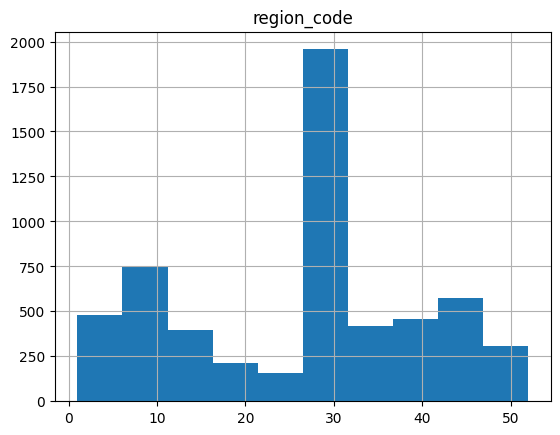

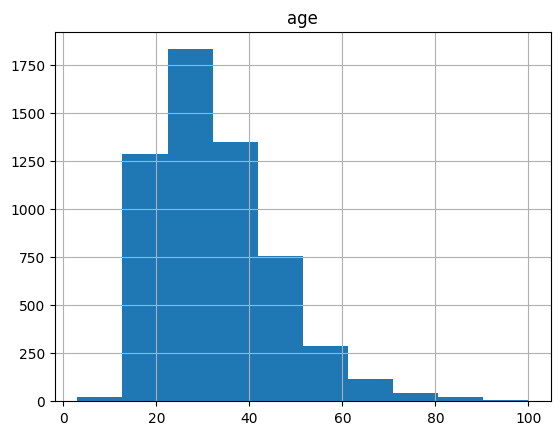

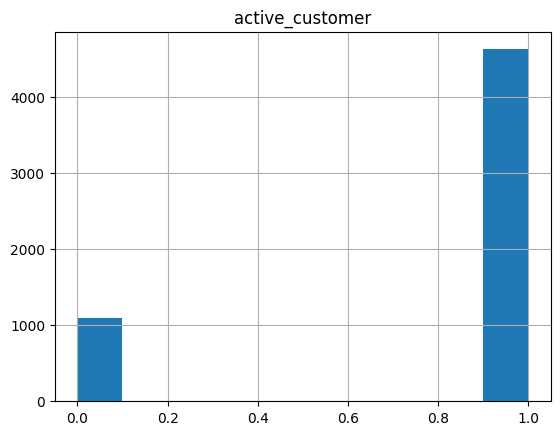

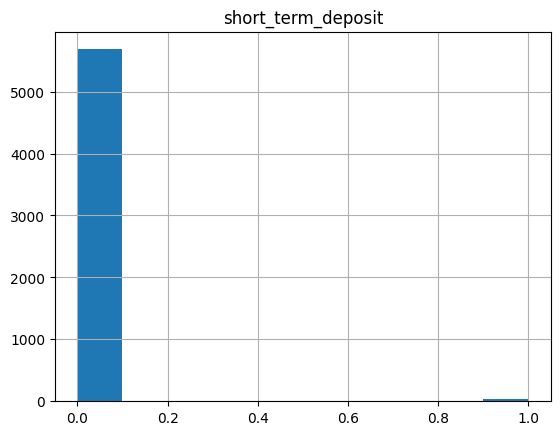

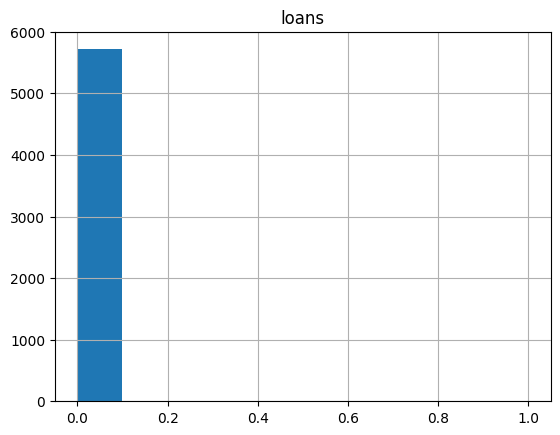

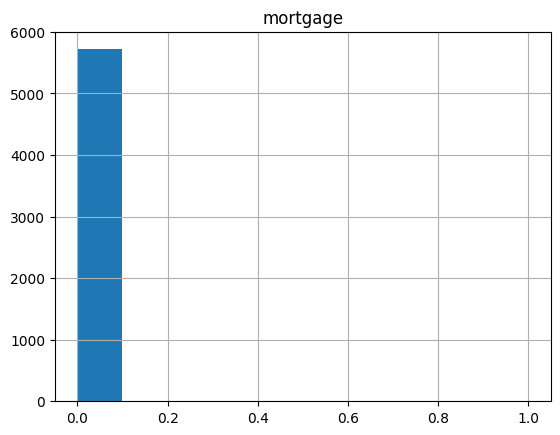

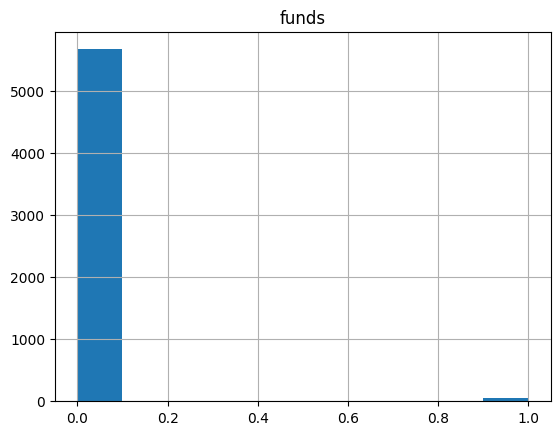

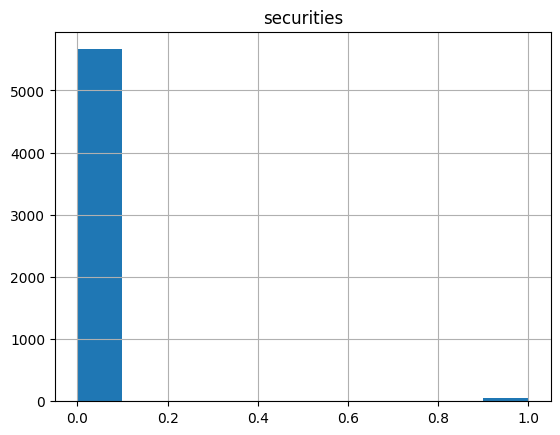

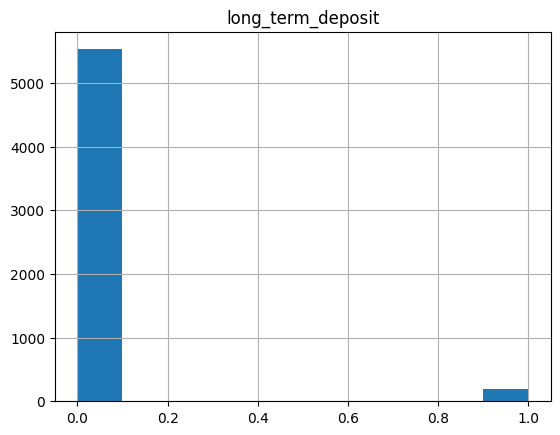

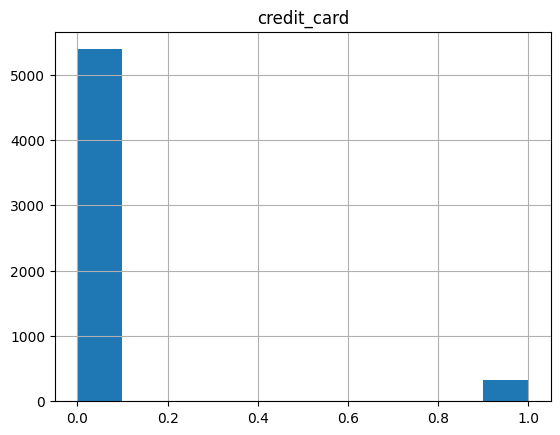

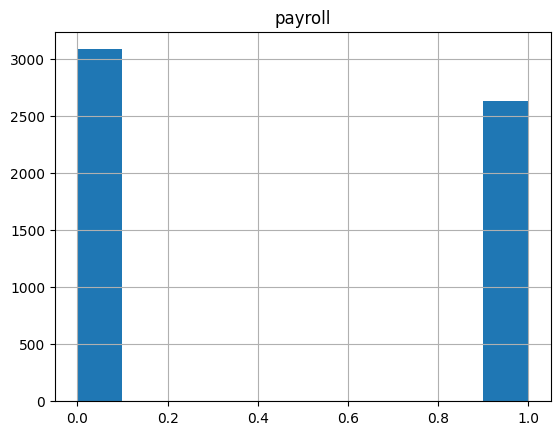

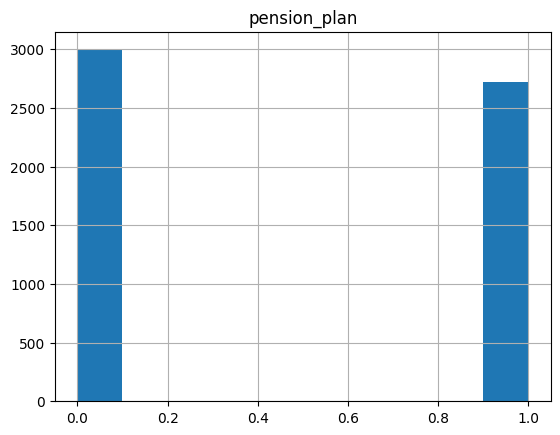

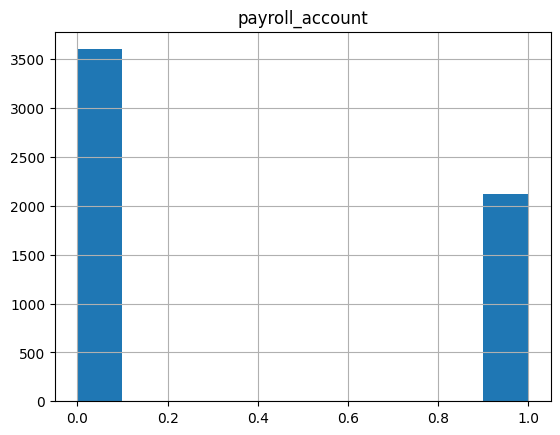

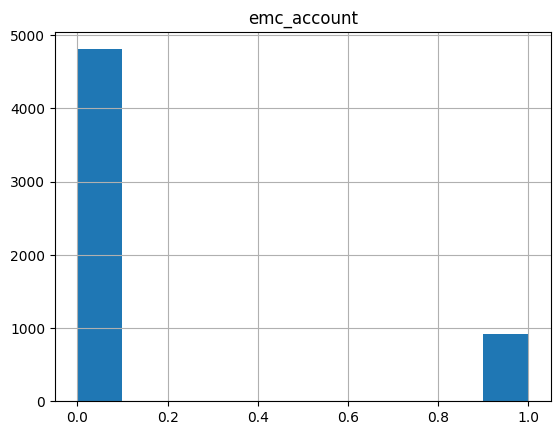

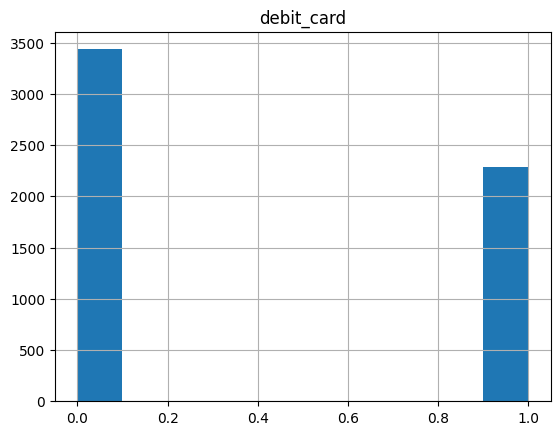

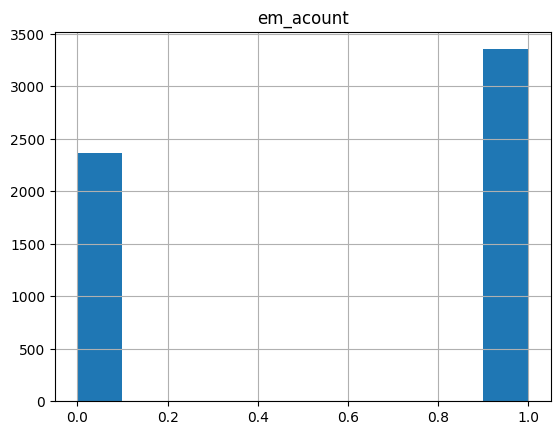

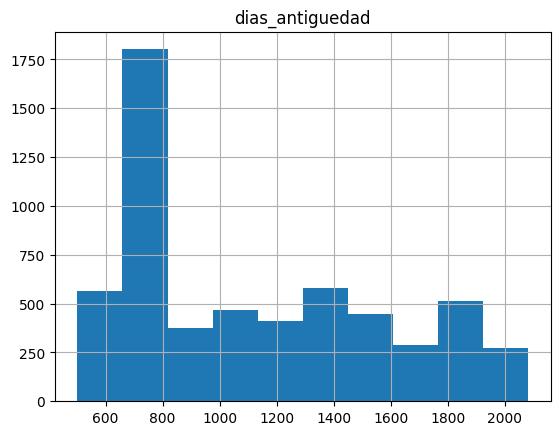

In [ ]:
for i in df2:
  if df2[i].dtype.kind == "O":
    print(i,'\n', df2[i].value_counts(), '\n')
  elif (df2[i].dtype.kind=="f") or (df2[i].dtype.kind=="i"):
    print(df2.hist(i))

country_id:
elimino porque practicamnte tiene solo 1 valor

In [ ]:
df3= df2.drop(columns=['country_id'], inplace=False)
a_predict3= a_predict2.drop(columns=['country_id'], inplace=False)

entry_chanel: agrupo valores menos frecuentes en others

In [ ]:
# Agrupar entry_channel con menor frecuencia, dejo hasta la frecuecia acomulada del 90%

frequencies = df3['entry_channel'].value_counts(normalize=True)
cumulative_frequencies = frequencies.cumsum()

# Identifica las categorías que suman hasta el 90%
main_categories = cumulative_frequencies[cumulative_frequencies <= 0.9].index

# Reemplaza las categorías que no están en 'main_categories' con 'others'
df3['entry_channel'] = df3['entry_channel'].apply(lambda x: x if x in main_categories else 'others')
a_predict3['entry_channel'] = a_predict3['entry_channel'].apply(lambda x: x if x in main_categories else 'others')

# Verifica el resultado
print(df3['entry_channel'].value_counts())

entry_channel
KHM       1838
KFC       1328
KHE        675
others     661
KAT        600
KHN        341
KHK        275
Name: count, dtype: int64


In [ ]:
print(a_predict3['entry_channel'].value_counts())

entry_channel
others    14574
KHM       13223
KFC       10204
KHE        9051
KHN        8413
KHK        7954
KAT        5720
Name: count, dtype: int64


region_code: agrupo valores menos frecuentes en others

In [ ]:
#convierto region_code en categorica
df3['region_code'] = df3['region_code'].astype('category')
a_predict3['region_code'] = a_predict3['region_code'].astype('category')

In [ ]:
# Agrupar region_code con menor frecuencia, dejo hasta la frecuecia acomulada del 90%

frequencies = df3['region_code'].value_counts(normalize=True)
cumulative_frequencies = frequencies.cumsum()

# Identifica las categorías que suman hasta el 90%
main_categories = cumulative_frequencies[cumulative_frequencies <= 0.9].index

# Reemplaza las categorías que no están en 'main_categories' con 'others'
df3['region_code'] = df3['region_code'].apply(lambda x: x if x in main_categories else 'others')
a_predict3['region_code'] = a_predict3['region_code'].apply(lambda x: x if x in main_categories else 'others')

# Verifica el resultado
print(df3['region_code'].value_counts())

region_code
28.0      1499
others     595
8.0        462
46.0       400
3.0        248
30.0       246
41.0       241
15.0       183
29.0       155
35.0       149
50.0       125
11.0       115
33.0       114
36.0       111
47.0       109
45.0        99
39.0        89
7.0         89
37.0        84
2.0         81
6.0         71
14.0        70
18.0        69
12.0        68
43.0        53
13.0        53
21.0        50
17.0        46
9.0         44
Name: count, dtype: int64


In [ ]:
print(a_predict3['region_code'].value_counts())

region_code
28.0      19127
others     8532
8.0        5325
46.0       4064
41.0       3283
3.0        2523
30.0       2404
29.0       2068
15.0       1918
11.0       1554
50.0       1384
35.0       1383
47.0       1369
33.0       1365
36.0       1351
18.0       1190
45.0       1155
39.0       1039
14.0       1003
37.0        967
7.0         833
6.0         812
13.0        748
2.0         740
12.0        722
43.0        708
21.0        601
9.0         599
17.0        372
Name: count, dtype: int64


## 7. Codificación de Variables Categóricas

Utilizamos codificación one-hot para transformar las variables categóricas en variables numéricas que puedan ser interpretadas por los modelos de machine learning.

Convertir 'H'-hombre a True y 'V' -mujer a False


In [ ]:
df4=df3.copy()

df4['gender'] = df4['gender'].map({'H': True, 'V': False})

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   region_code         5718 non-null   object 
 1   gender              5718 non-null   bool   
 2   age                 5718 non-null   int64  
 3   entry_channel       5718 non-null   object 
 4   active_customer     5718 non-null   float64
 5   segment             5718 non-null   object 
 6   short_term_deposit  5718 non-null   int64  
 7   loans               5718 non-null   int64  
 8   mortgage            5718 non-null   int64  
 9   funds               5718 non-null   int64  
 10  securities          5718 non-null   int64  
 11  long_term_deposit   5718 non-null   int64  
 12  credit_card         5718 non-null   int64  
 13  payroll             5718 non-null   int64  
 14  pension_plan        5718 non-null   int64  
 15  payroll_account     5718 non-null   int64  
 16  emc_ac

In [ ]:
a_predict4=a_predict3.copy()
a_predict4['gender'] = a_predict4['gender'].map({'H': True, 'V': False})

a_predict4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69139 entries, 16203 to 1548217
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   region_code         69139 non-null  object 
 1   gender              69139 non-null  bool   
 2   age                 69139 non-null  int64  
 3   entry_channel       69139 non-null  object 
 4   active_customer     69139 non-null  float64
 5   segment             69139 non-null  object 
 6   short_term_deposit  69139 non-null  int64  
 7   loans               69139 non-null  int64  
 8   mortgage            69139 non-null  int64  
 9   funds               69139 non-null  int64  
 10  securities          69139 non-null  int64  
 11  long_term_deposit   69139 non-null  int64  
 12  credit_card         69139 non-null  int64  
 13  payroll             69139 non-null  int64  
 14  pension_plan        69139 non-null  int64  
 15  payroll_account     69139 non-null  int64  
 16  emc

In [ ]:
df4['entry_channel'].value_counts()

entry_channel
KHM       1838
KFC       1328
KHE        675
others     661
KAT        600
KHN        341
KHK        275
Name: count, dtype: int64

In [ ]:
df4['segment'].value_counts()

segment
02 - PARTICULARES     4119
03 - UNIVERSITARIO    1417
01 - TOP               182
Name: count, dtype: int64

In [ ]:
df4['region_code'].value_counts()

region_code
28.0      1499
others     595
8.0        462
46.0       400
3.0        248
30.0       246
41.0       241
15.0       183
29.0       155
35.0       149
50.0       125
11.0       115
33.0       114
36.0       111
47.0       109
45.0        99
39.0        89
7.0         89
37.0        84
2.0         81
6.0         71
14.0        70
18.0        69
12.0        68
43.0        53
13.0        53
21.0        50
17.0        46
9.0         44
Name: count, dtype: int64

In [ ]:
df4=pd.get_dummies(data=df4, columns=['entry_channel'])
df4=pd.get_dummies(data=df4, columns=['segment'])
df4=pd.get_dummies(data=df4, columns=['region_code'])
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      5718 non-null   bool   
 1   age                         5718 non-null   int64  
 2   active_customer             5718 non-null   float64
 3   short_term_deposit          5718 non-null   int64  
 4   loans                       5718 non-null   int64  
 5   mortgage                    5718 non-null   int64  
 6   funds                       5718 non-null   int64  
 7   securities                  5718 non-null   int64  
 8   long_term_deposit           5718 non-null   int64  
 9   credit_card                 5718 non-null   int64  
 10  payroll                     5718 non-null   int64  
 11  pension_plan                5718 non-null   int64  
 12  payroll_account             5718 non-null   int64  
 13  emc_account                 5718 

In [ ]:
a_predict4=pd.get_dummies(data=a_predict4, columns=['entry_channel'])
a_predict4=pd.get_dummies(data=a_predict4, columns=['segment'])
a_predict4=pd.get_dummies(data=a_predict4, columns=['region_code'])
a_predict4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69139 entries, 16203 to 1548217
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      69139 non-null  bool   
 1   age                         69139 non-null  int64  
 2   active_customer             69139 non-null  float64
 3   short_term_deposit          69139 non-null  int64  
 4   loans                       69139 non-null  int64  
 5   mortgage                    69139 non-null  int64  
 6   funds                       69139 non-null  int64  
 7   securities                  69139 non-null  int64  
 8   long_term_deposit           69139 non-null  int64  
 9   credit_card                 69139 non-null  int64  
 10  payroll                     69139 non-null  int64  
 11  pension_plan                69139 non-null  int64  
 12  payroll_account             69139 non-null  int64  
 13  emc_account                 69

## 8. Análisis de Correlación y Transformaciones

Realizamos un análisis de correlación y aplicamos transformaciones a las variables numéricas para mejorar el rendimiento del modelo.

In [ ]:
corr = df4.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
df5= df4.drop(columns=['payroll','payroll_account'], inplace=False)
a_predict5= a_predict4.drop(columns=['payroll','payroll_account'], inplace=False)

In [ ]:
# Comparar target vs features
target=["pension_plan"]
features= df5.columns.drop(target)

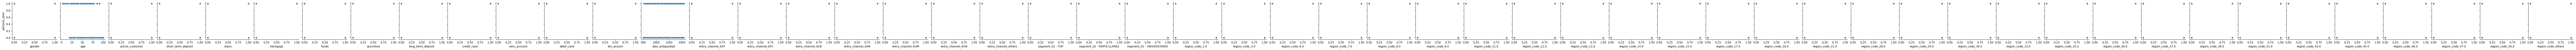

In [ ]:
sns.pairplot(df5,x_vars=features, y_vars=target)
plt.show()

In [ ]:
# se ve que nadie que tenga  mortgage tiene pension_plan, analizo si dejo o saco
correlation = df5['mortgage'].corr(df5['pension_plan'])
print(correlation)


0.01965191101398799


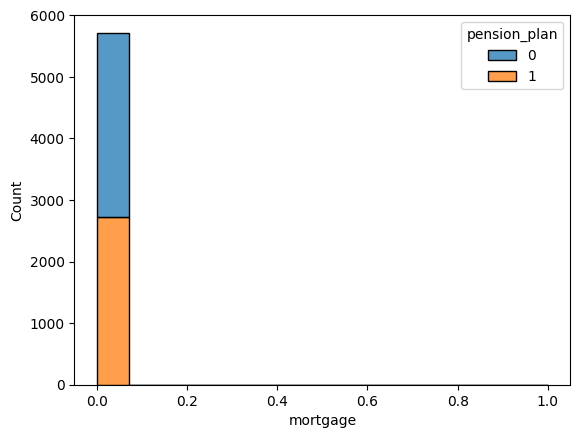

In [ ]:
sns.histplot(data=df5, x='mortgage', hue='pension_plan', multiple='stack')
plt.show()


In [ ]:
#la elimino
df5= df5.drop(columns=['mortgage'], inplace=False)
a_predict5= a_predict5.drop(columns=['mortgage'], inplace=False)

features=features.drop('mortgage')

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      5718 non-null   bool   
 1   age                         5718 non-null   int64  
 2   active_customer             5718 non-null   float64
 3   short_term_deposit          5718 non-null   int64  
 4   loans                       5718 non-null   int64  
 5   funds                       5718 non-null   int64  
 6   securities                  5718 non-null   int64  
 7   long_term_deposit           5718 non-null   int64  
 8   credit_card                 5718 non-null   int64  
 9   pension_plan                5718 non-null   int64  
 10  emc_account                 5718 non-null   int64  
 11  debit_card                  5718 non-null   int64  
 12  em_acount                   5718 non-null   int64  
 13  dias_antiguedad             5718 

In [ ]:
# int a bool
lista_a_modif=["active_customer", 'short_term_deposit', 'loans','funds', 'securities','long_term_deposit', 'credit_card', 'pension_plan', 'emc_account', 'debit_card', 'em_acount']
for i in lista_a_modif:
  df5[i]=np.where(df5[i]==0,False,True )
  a_predict5[i]=np.where(a_predict5[i]==0,False,True )

In [ ]:
# Agrupar por tipo
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)
    return lista_numericas, lista_boolean, lista_categoricas

lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df5)

In [ ]:
print("Total de variables: ", len(df5.columns))
print(len(target), "variable a predecir")
print(len(lista_categoricas), "variables categóricas")
print(len(lista_boolean), "variables boolean")
print(len(lista_numericas), "variables numéricas")

Total de variables:  53
1 variable a predecir
0 variables categóricas
50 variables boolean
2 variables numéricas


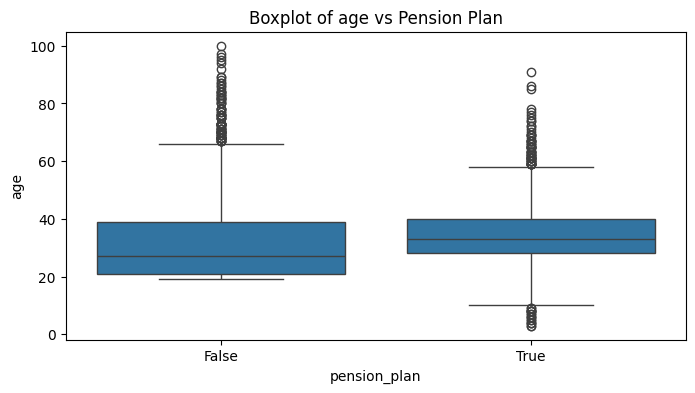

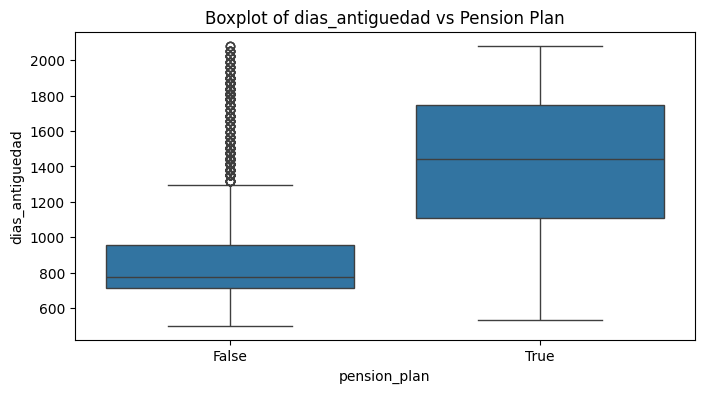

In [ ]:
# Crear gráficos para las variables numéricas
for var in lista_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='pension_plan', y=var, data=df5)
    plt.title(f'Boxplot of {var} vs Pension Plan')
    plt.show()


In [ ]:
#Evaluar si son significativas
numeric_vars_a_elim = ['short_term_deposit', 'loans', 'funds', 'securities',
                'long_term_deposit', 'credit_card', 'emc_account', 'debit_card', 'em_acount']

for i in numeric_vars_a_elim:
  print(df5[i].value_counts(), '\n')


short_term_deposit
False    5683
True       35
Name: count, dtype: int64 

loans
False    5715
True        3
Name: count, dtype: int64 

funds
False    5672
True       46
Name: count, dtype: int64 

securities
False    5663
True       55
Name: count, dtype: int64 

long_term_deposit
False    5527
True      191
Name: count, dtype: int64 

credit_card
False    5389
True      329
Name: count, dtype: int64 

emc_account
False    4805
True      913
Name: count, dtype: int64 

debit_card
False    3434
True     2284
Name: count, dtype: int64 

em_acount
True     3352
False    2366
Name: count, dtype: int64 



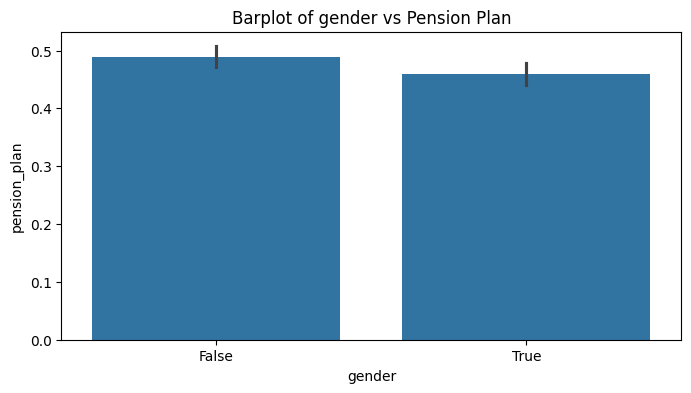

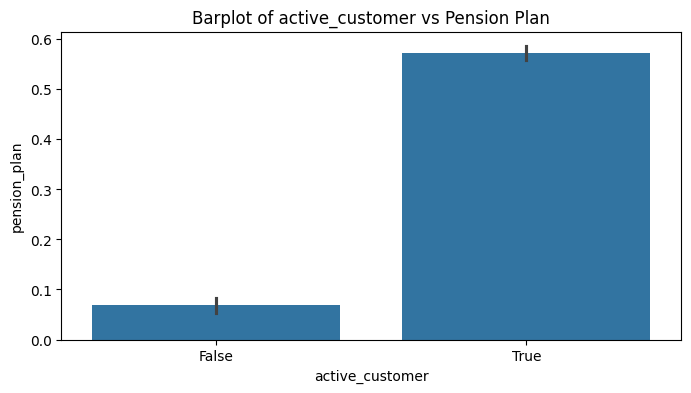

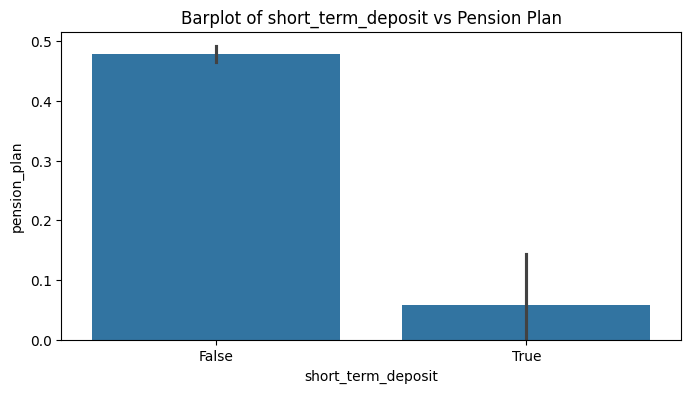

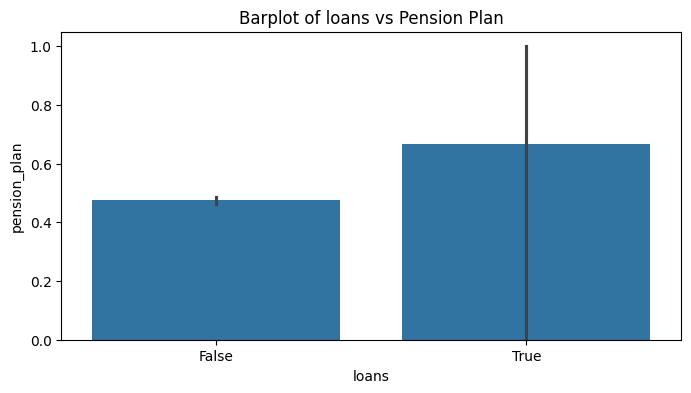

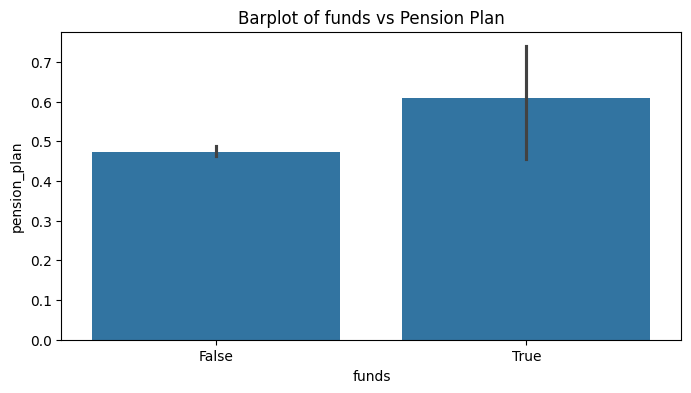

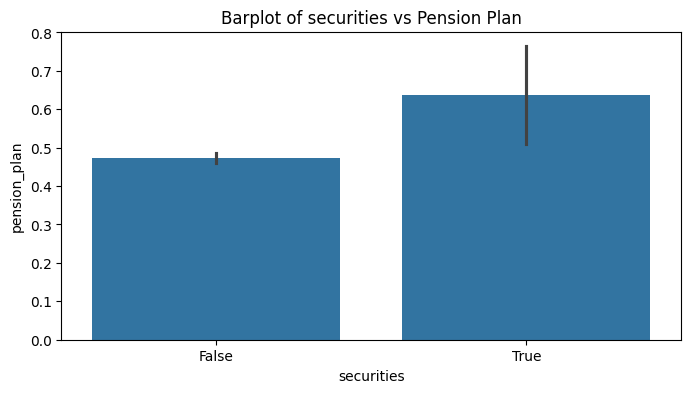

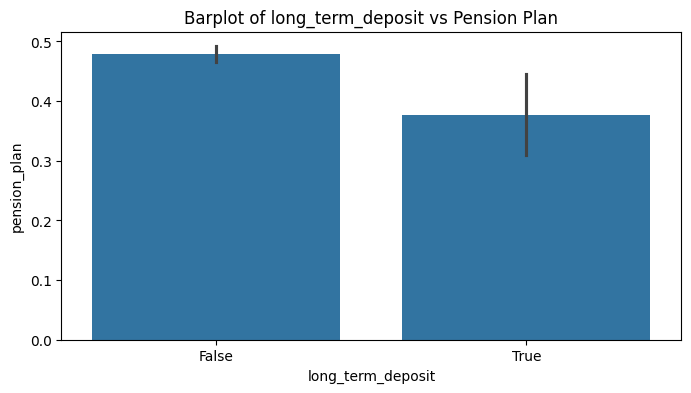

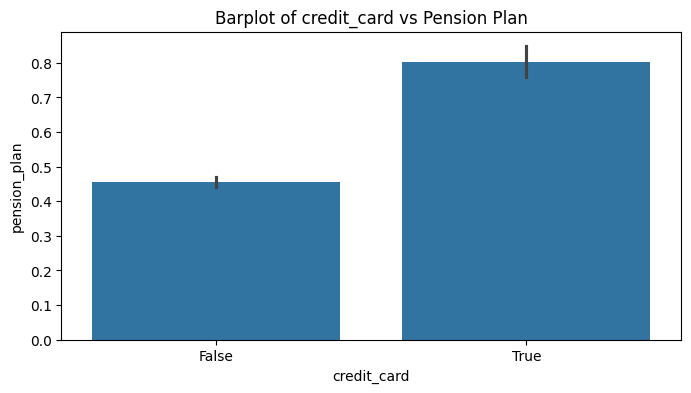

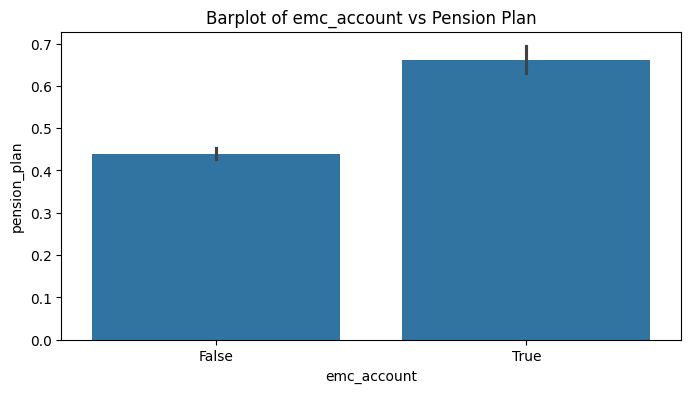

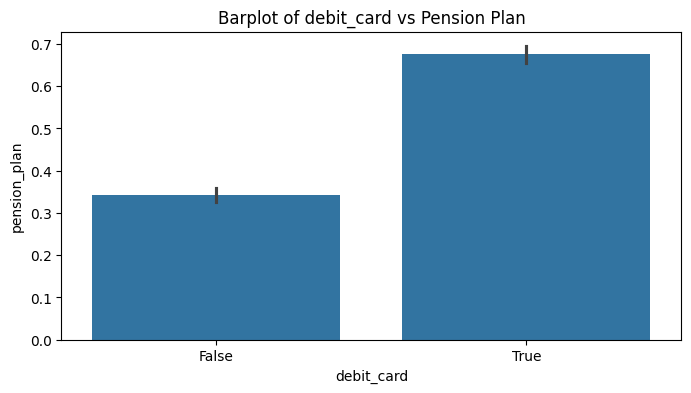

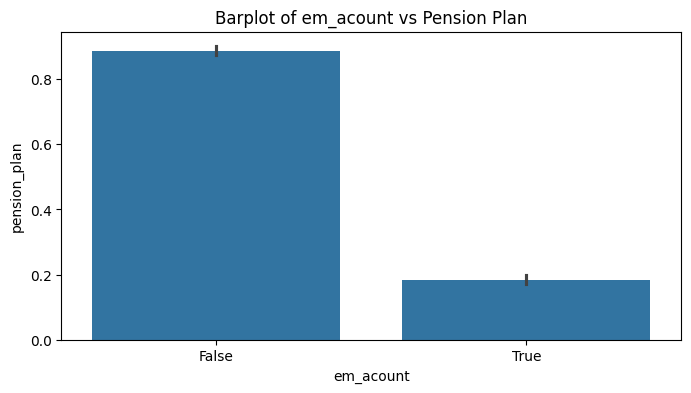

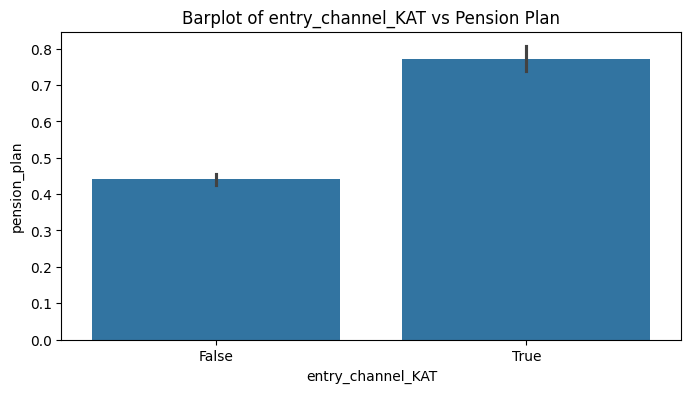

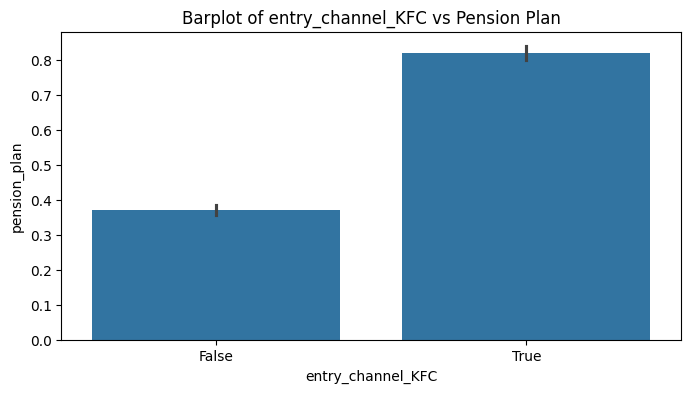

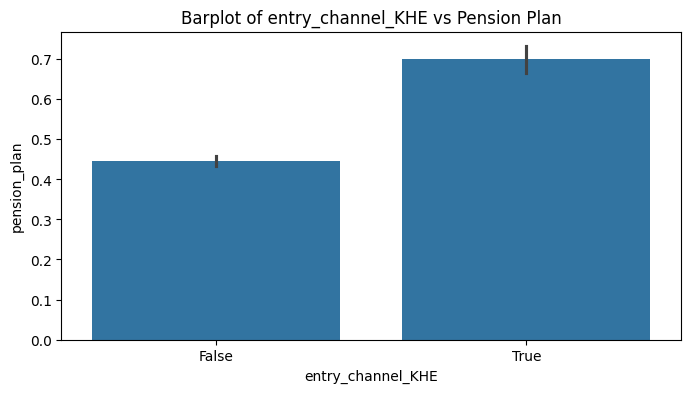

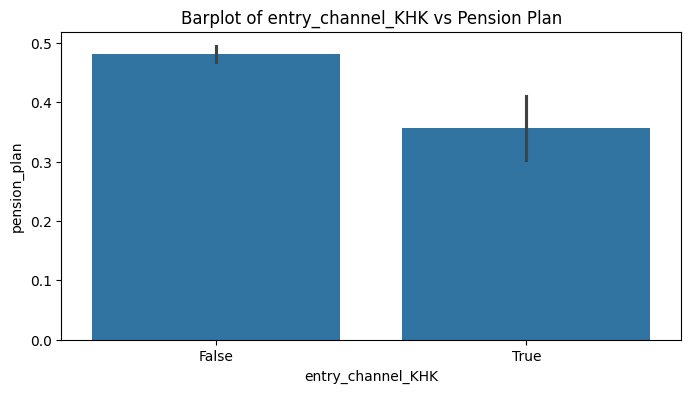

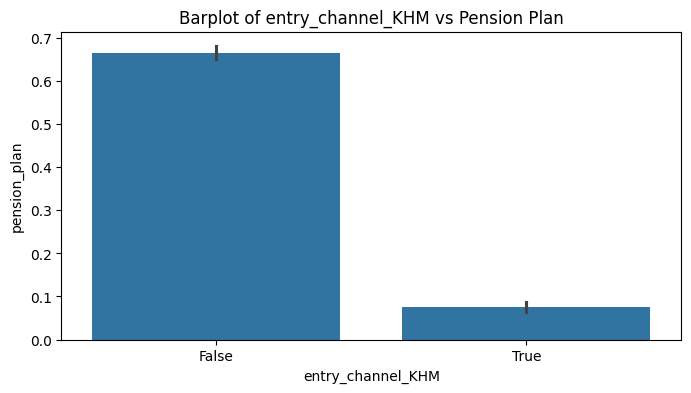

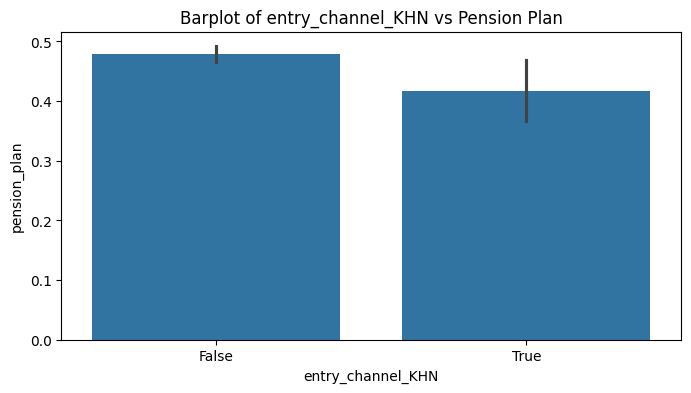

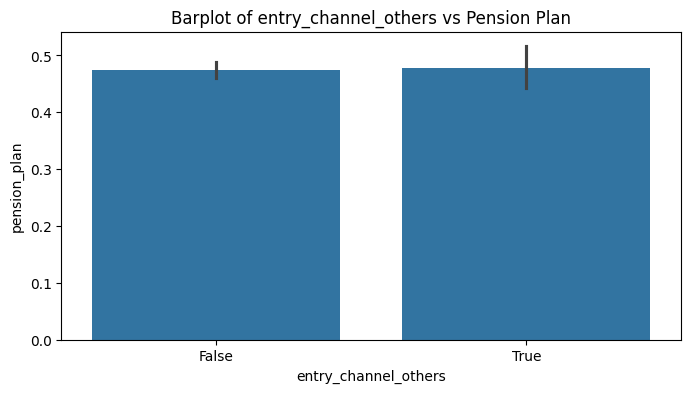

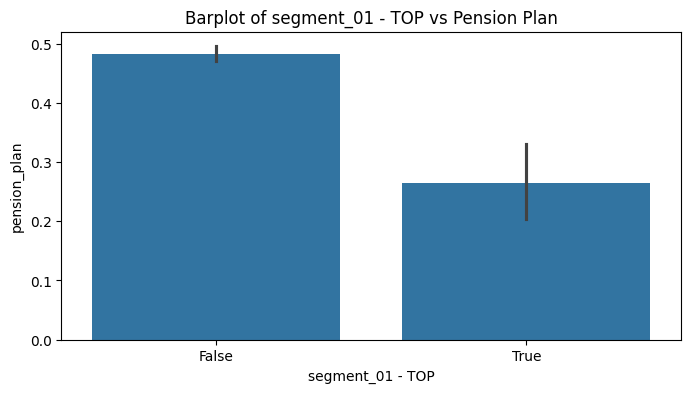

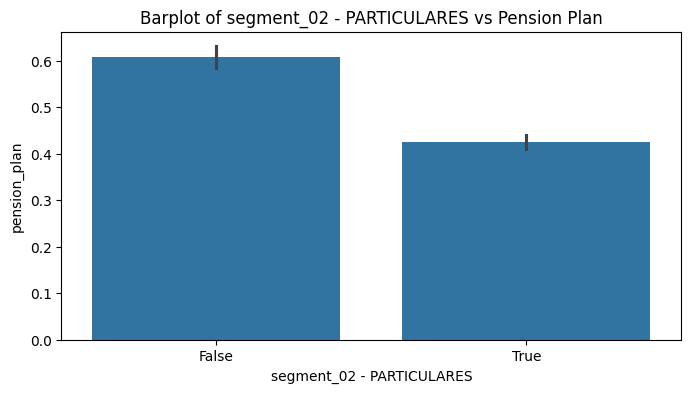

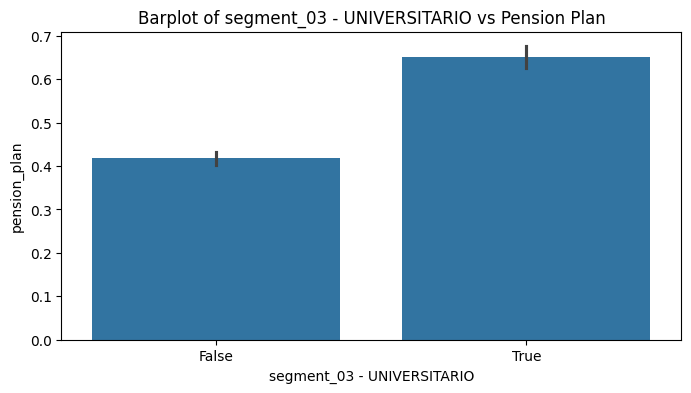

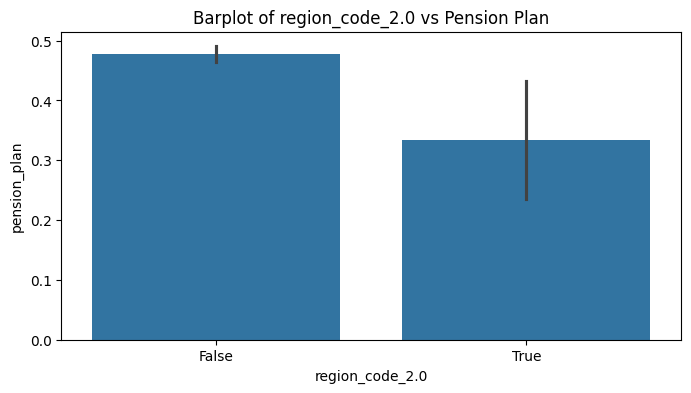

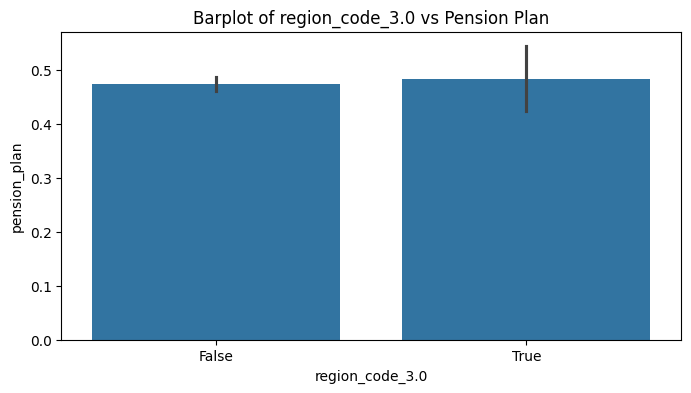

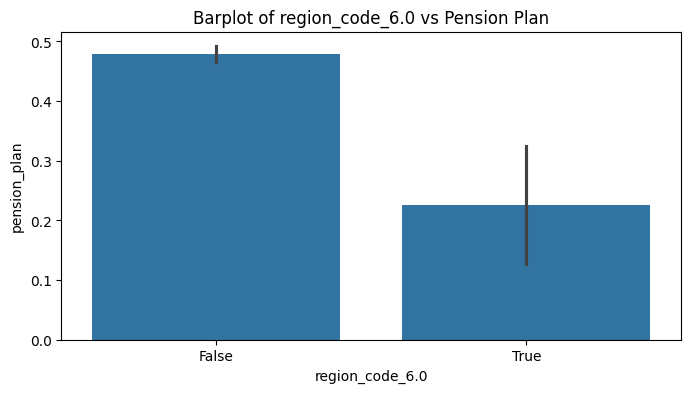

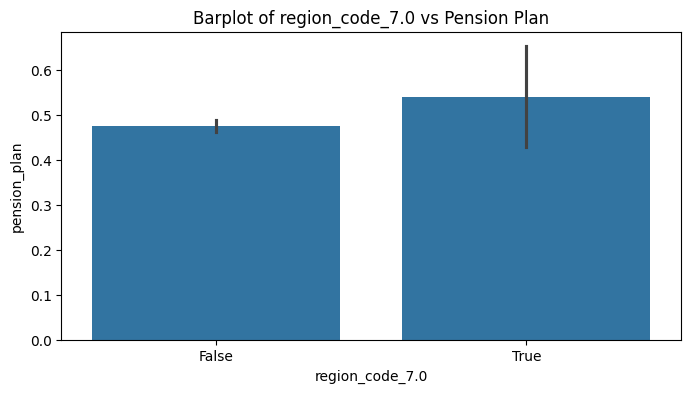

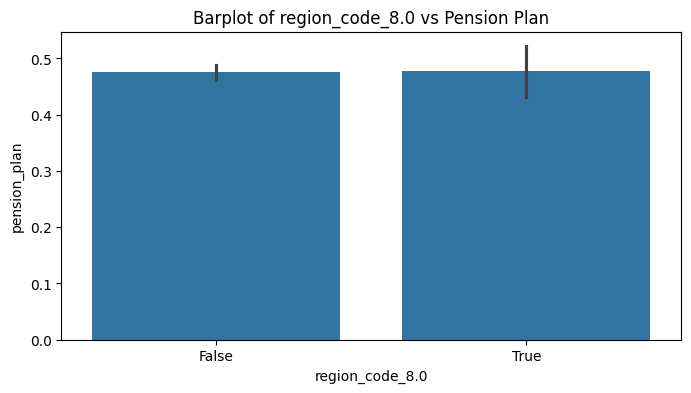

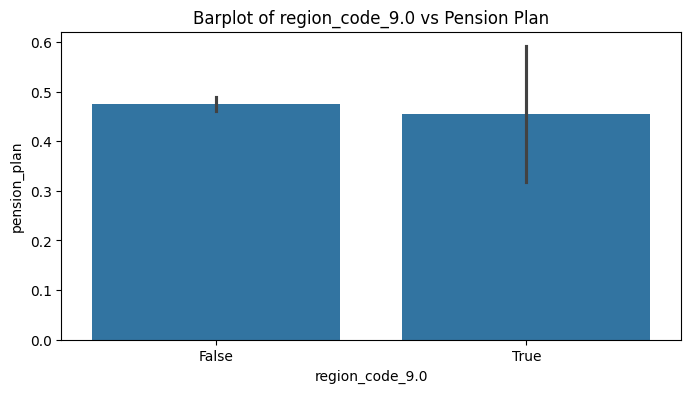

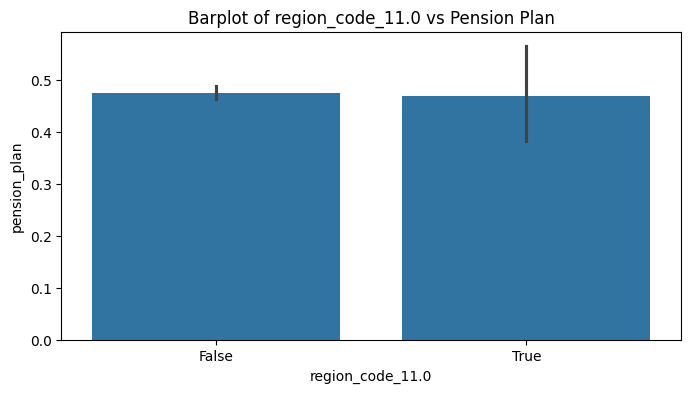

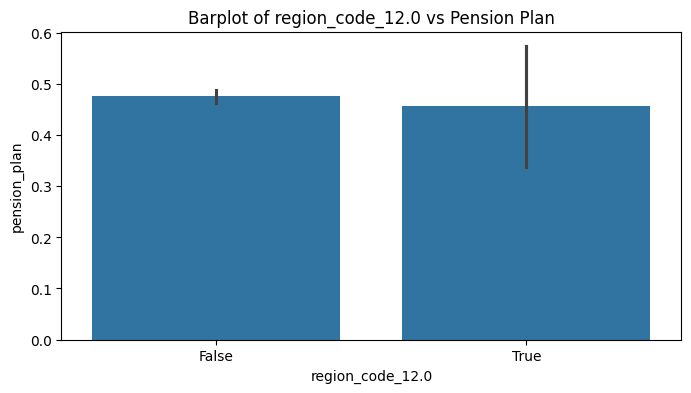

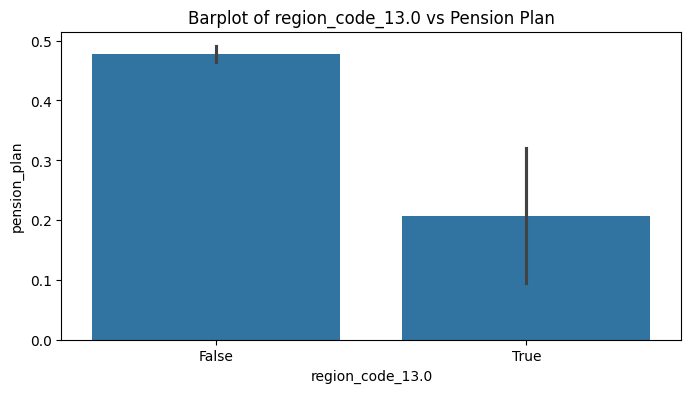

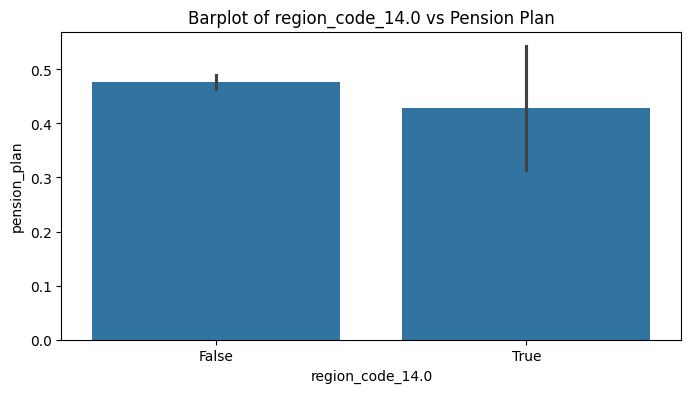

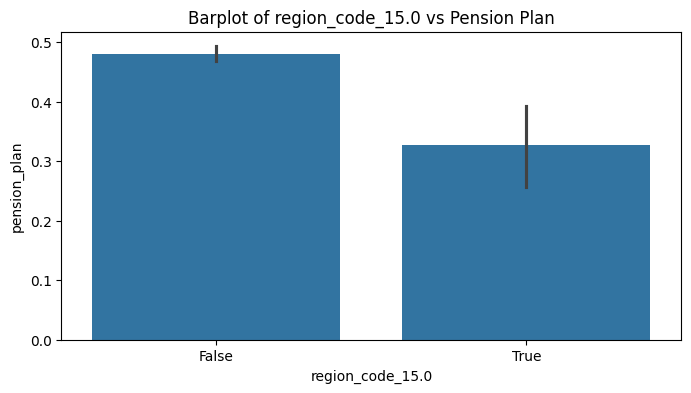

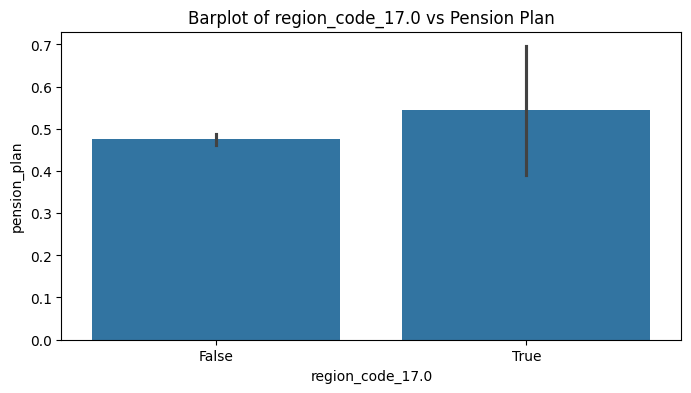

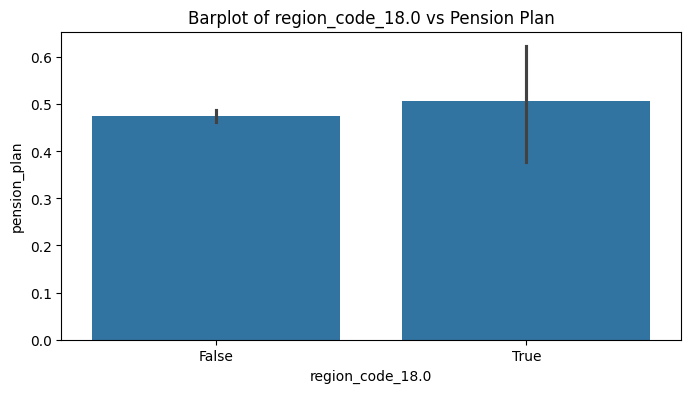

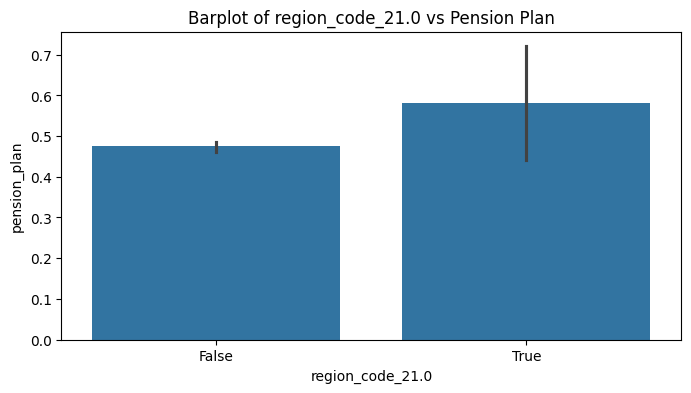

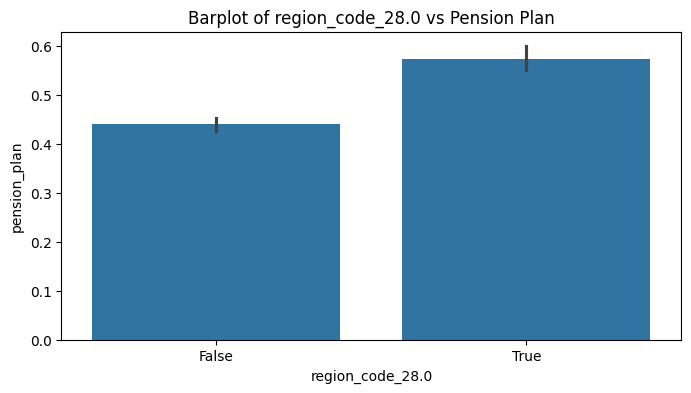

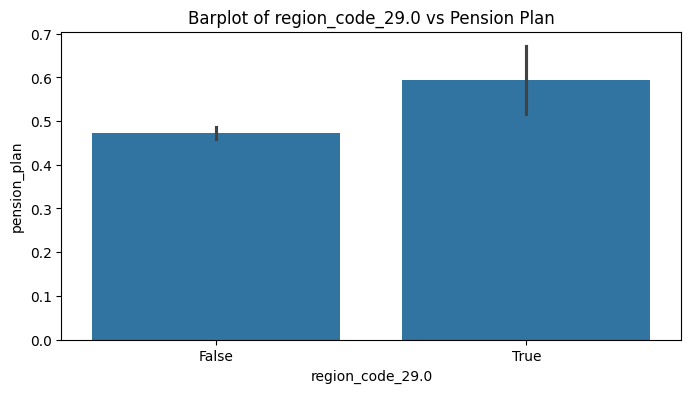

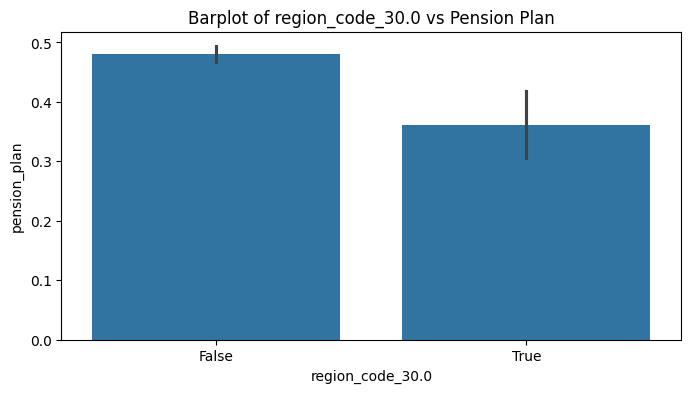

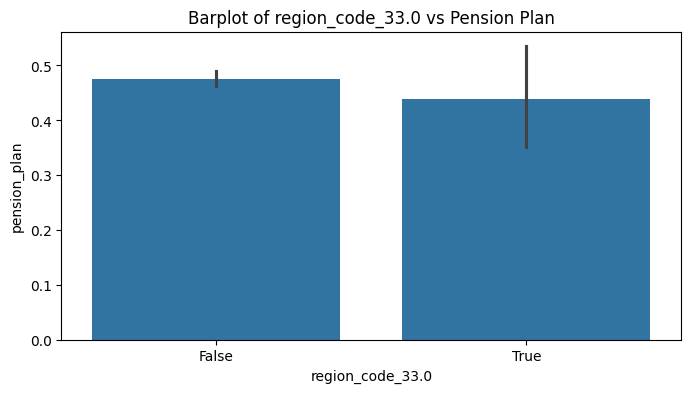

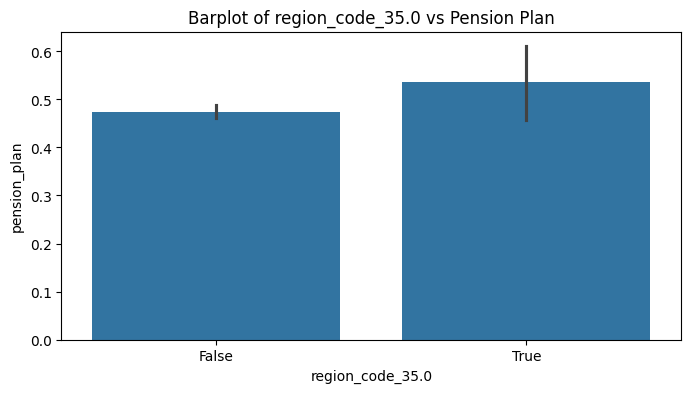

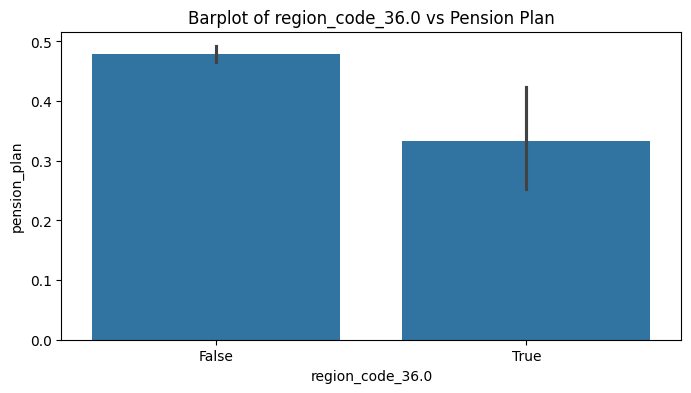

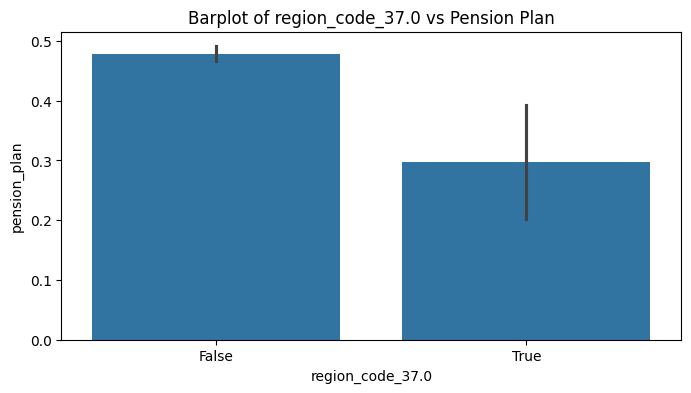

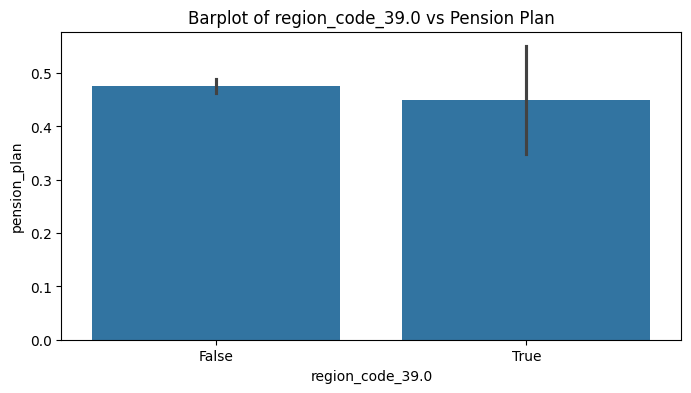

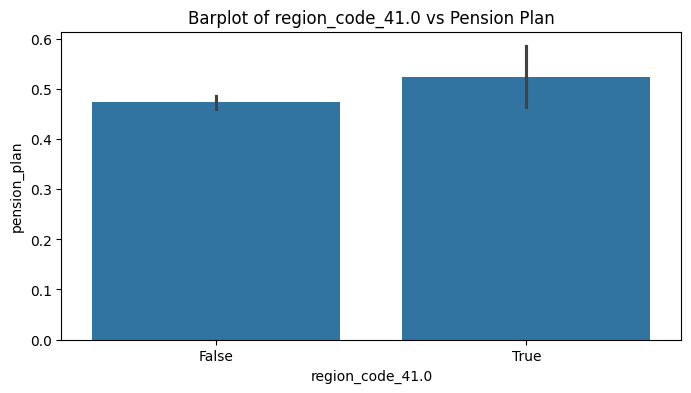

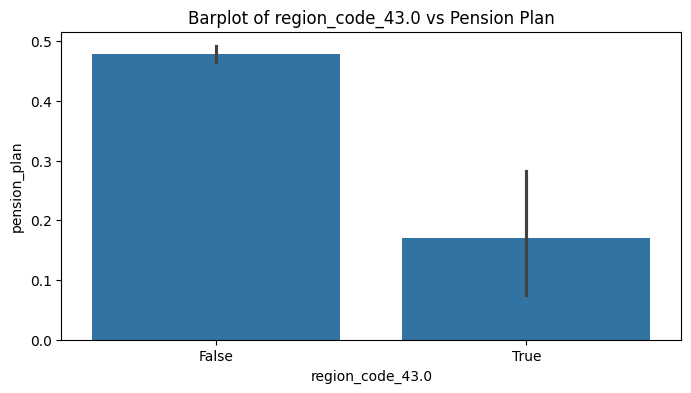

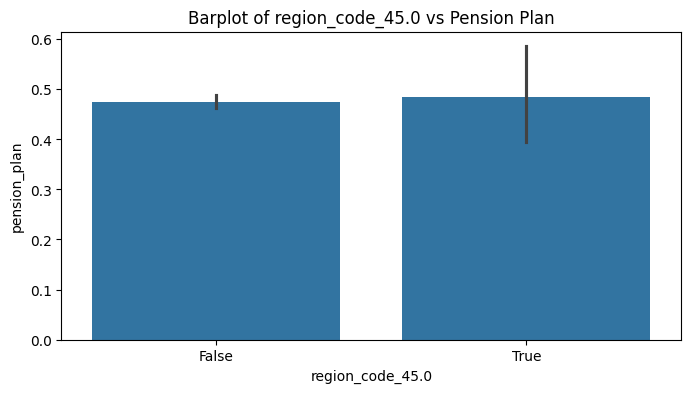

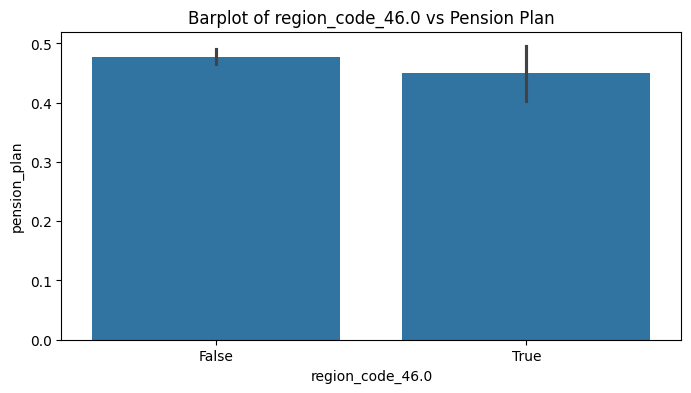

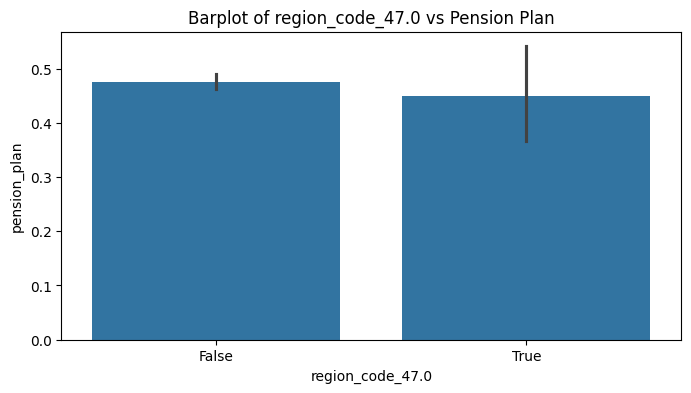

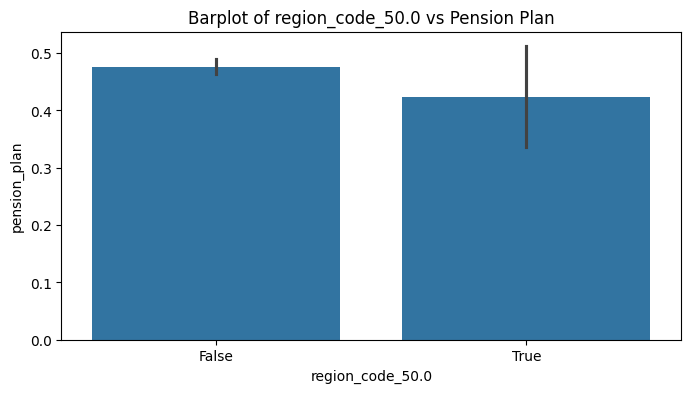

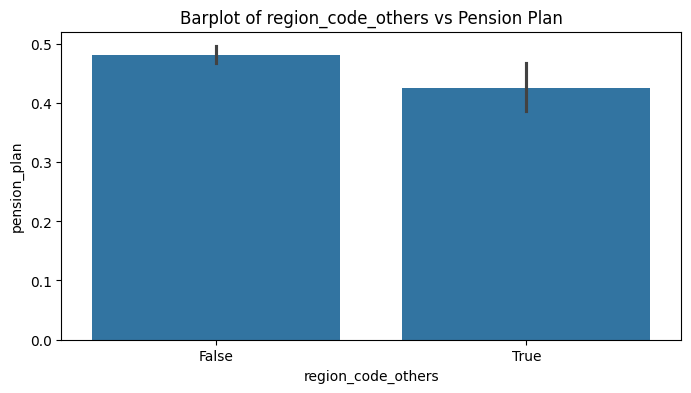

In [ ]:
# Crear gráficos para las variables categóricas
for var in lista_boolean:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=var, y='pension_plan', data=df5)
    plt.title(f'Barplot of {var} vs Pension Plan')
    plt.show()

In [ ]:
# las variables que estan muy desequilibradas las vamos a eliminar
vars_a_elim=['short_term_deposit', 'loans', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'emc_account']

Analizo si salay y age estan muy correlacionadas

In [ ]:
#sns.violinplot(x="pension_plan", y='salary', data=df5, palette="Wistia")

In [ ]:
#df5 = df5[df5['salary'] <= 65000]
#df5.shape

In [ ]:
#a_predict5 = a_predict5[a_predict5['salary'] <= 65000]
#a_predict5.shape

In [ ]:
#elimino de mi dataset

df5= df5.drop(columns=vars_a_elim, inplace=False)
a_predict5= a_predict5.drop(columns=vars_a_elim, inplace=False)

<ipython-input-918-f23b6018d3b0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="pension_plan", y='age', data=df5, palette="Wistia")


<Axes: xlabel='pension_plan', ylabel='age'>

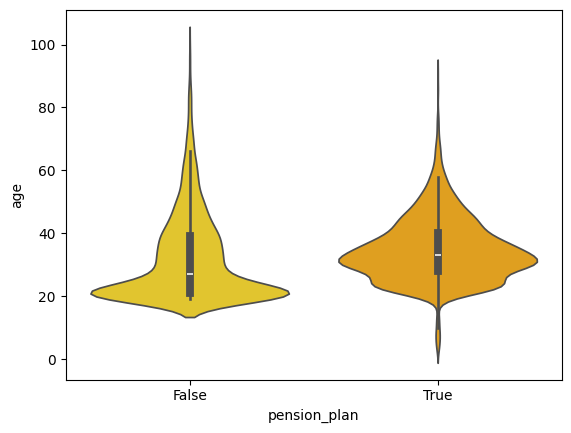

In [ ]:
sns.violinplot(x="pension_plan", y='age', data=df5, palette="Wistia")

In [ ]:
#df5 = df5[df5['age'] >= 18]
#df5.shape

In [ ]:
df5['age'].min()

3

In [ ]:
#a_predict5 = a_predict5[a_predict5['age'] >= 18]
#a_predict5.shape

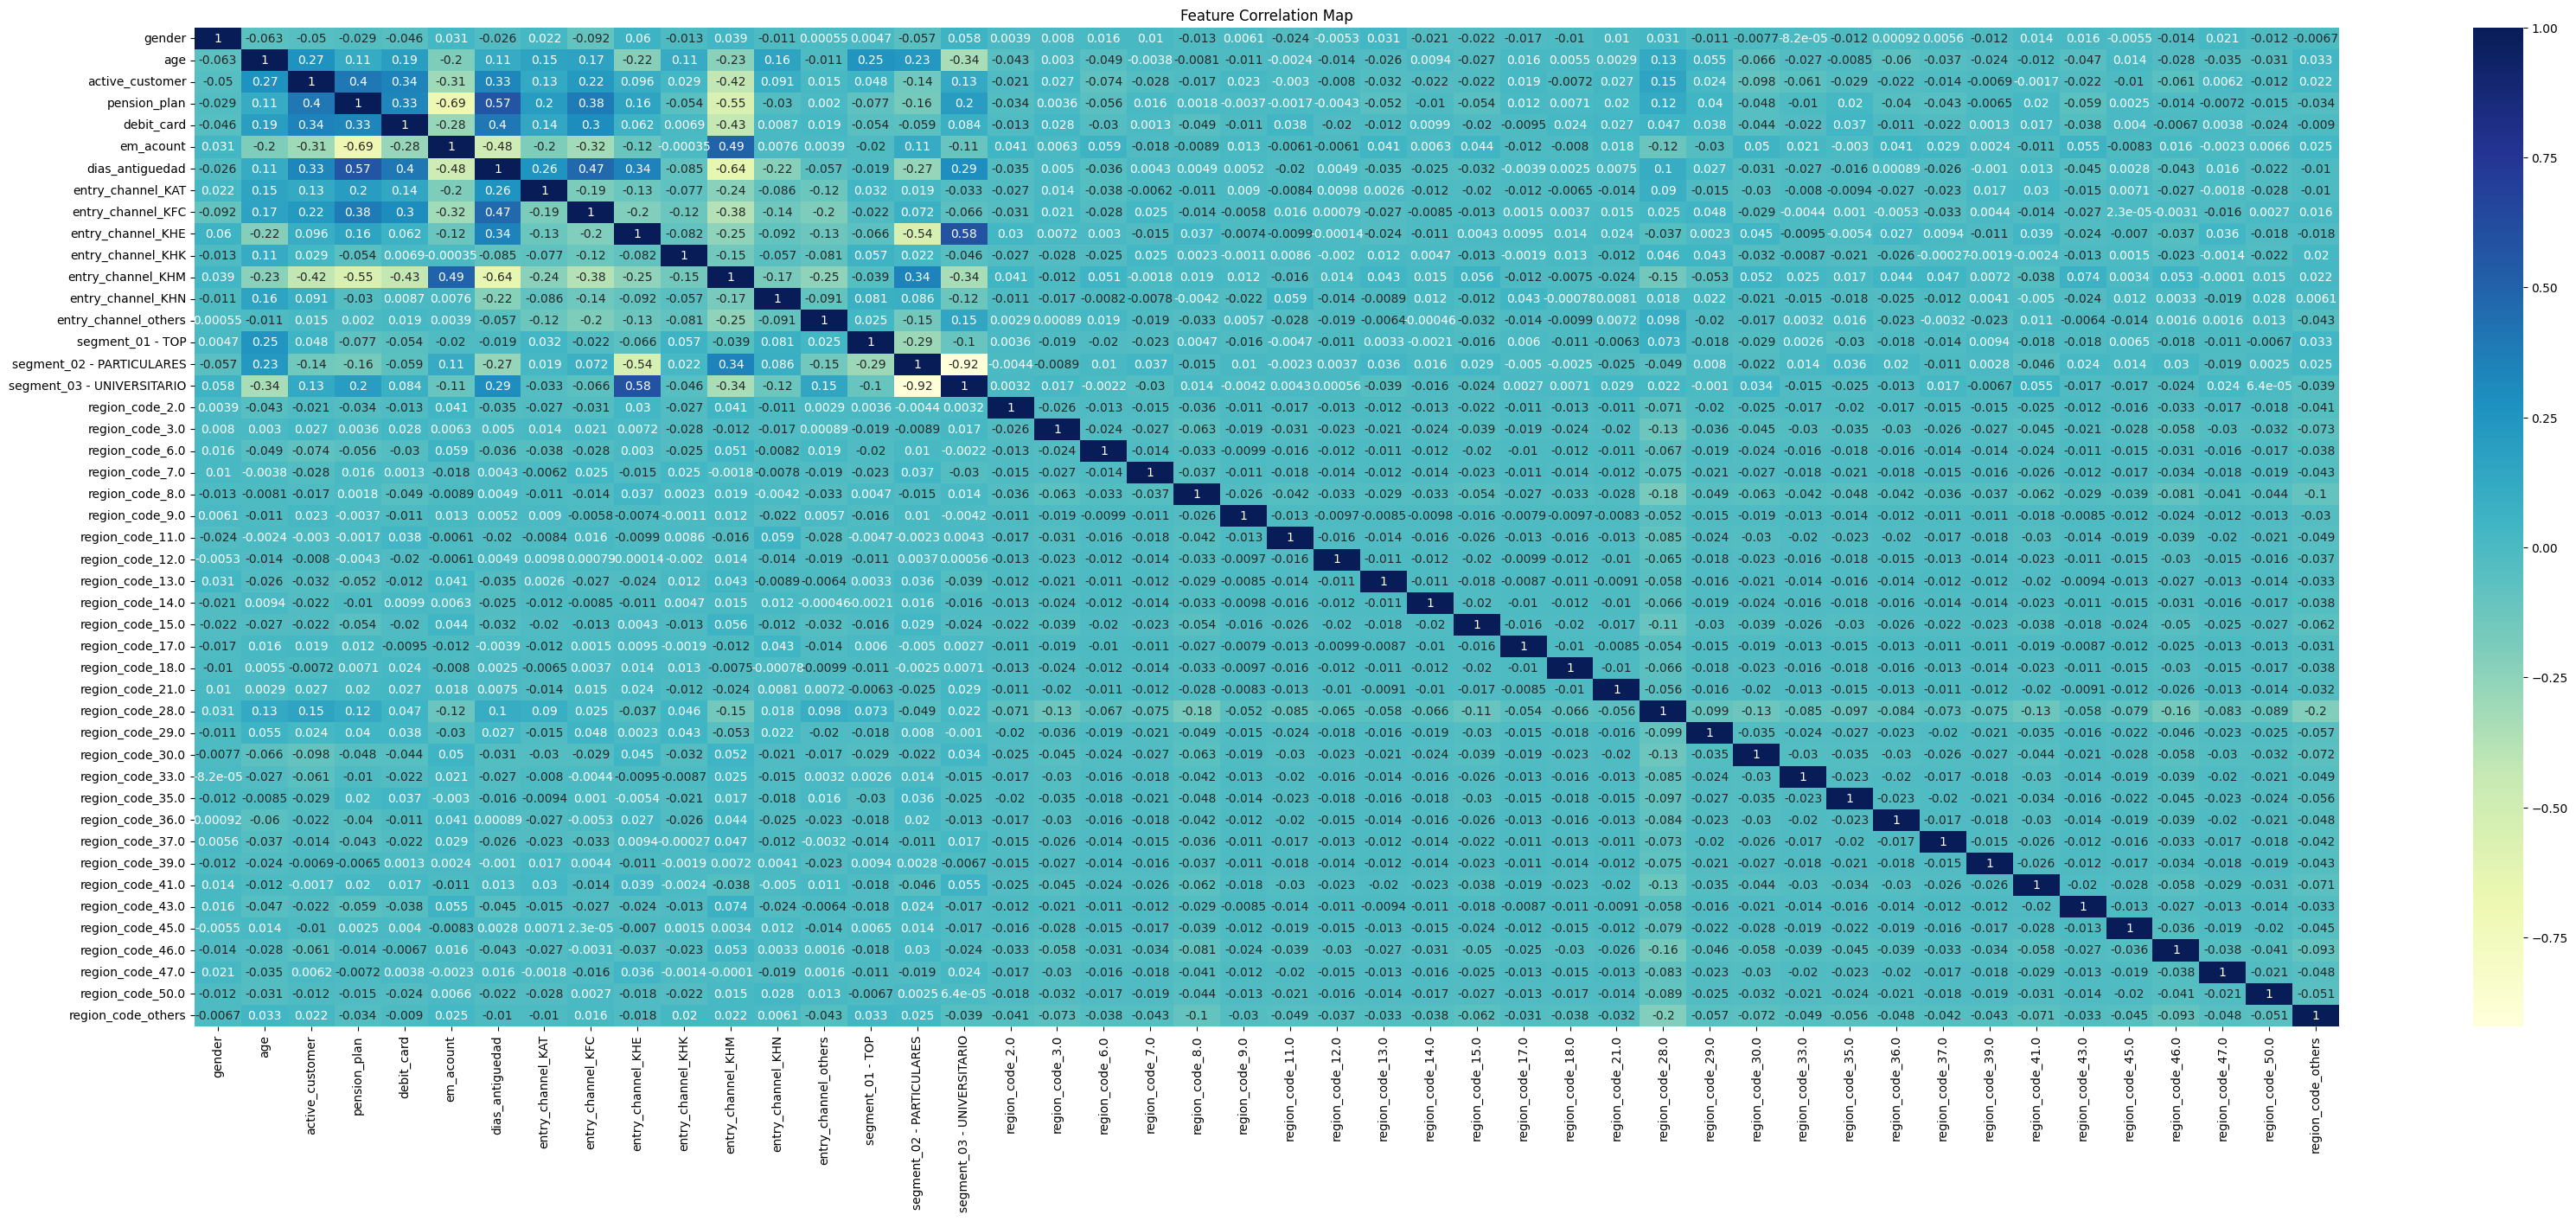

In [ ]:
plt.figure(figsize=(40,15))
sns.heatmap(df5.corr(),cmap="YlGnBu", annot=True);
plt.title("Feature Correlation Map");

Analizo los valores float

[[<Axes: title={'center': 'age'}>]]


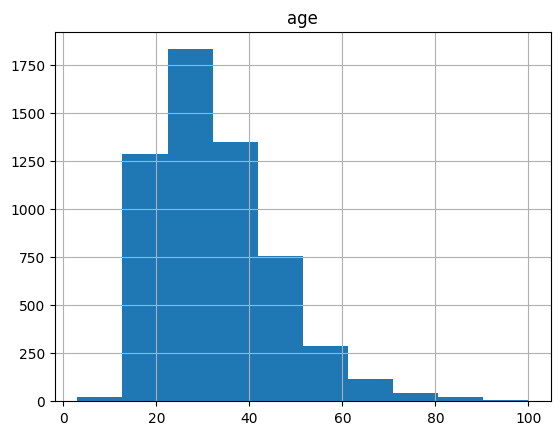

In [ ]:
for i in df5.columns[1:2]:
  print(df5.hist(i))

[[<Axes: title={'center': 'dias_antiguedad'}>]]


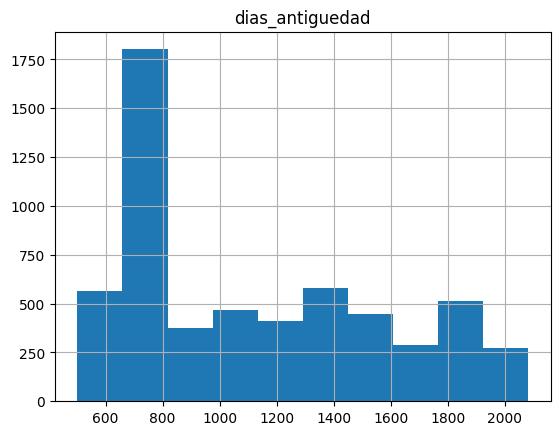

In [ ]:
print(df5.hist('dias_antiguedad'))

In [ ]:
# busco normalizar la distribucion
df6=df5.copy()
a_predict6=a_predict5.copy()

df6["log_age"]=np.log10(df6["age"])
#df6["log_salary"]=np.log10(df6["salary"])
df6["log_dias_antiguedad"]=np.log10(df6["dias_antiguedad"])

a_predict6["log_age"]=np.log10(a_predict6["age"])
#a_predict6["log_salary"]=np.log10(a_predict6["salary"])
a_predict6["log_dias_antiguedad"]=np.log10(a_predict6["dias_antiguedad"])


df6.drop(['age', 'dias_antiguedad'], axis=1, inplace=True)
a_predict6.drop([ 'age', 'dias_antiguedad'], axis=1, inplace=True)

[[<Axes: title={'center': 'log_age'}>]]
[[<Axes: title={'center': 'log_dias_antiguedad'}>]]


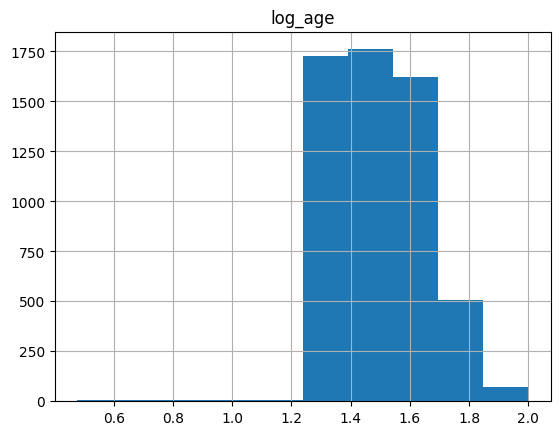

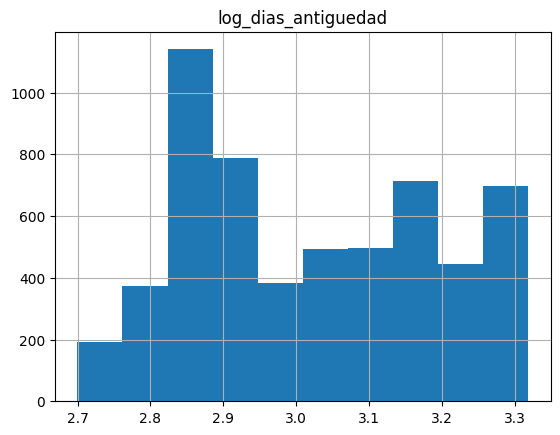

In [ ]:
for i in df6.columns[-2:]:
  print(df6.hist(i))

In [ ]:
# busco normalizar la distribucion una vez mas

df6["log_log_age"]=np.log10(df6["log_age"])
df6["log_log_dias_antiguedad"]=np.log10(df6["log_dias_antiguedad"])

a_predict6["log_log_age"]=np.log10(a_predict6["log_age"])
a_predict6["log_log_dias_antiguedad"]=np.log10(a_predict6["log_dias_antiguedad"])

df6.drop(['log_age', 'log_dias_antiguedad'], axis=1, inplace=True)
a_predict6.drop([ 'log_age', 'log_dias_antiguedad'], axis=1, inplace=True)

[[<Axes: title={'center': 'log_log_age'}>]]
[[<Axes: title={'center': 'log_log_dias_antiguedad'}>]]


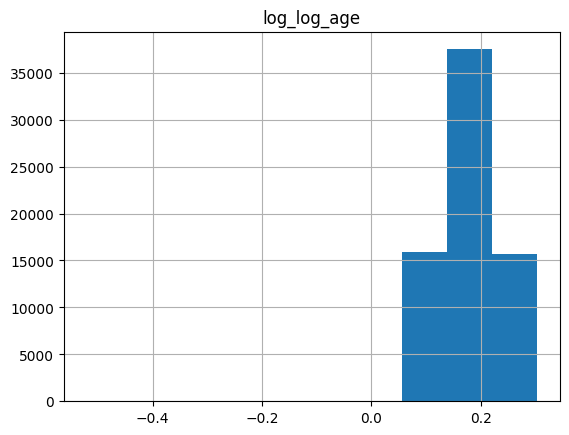

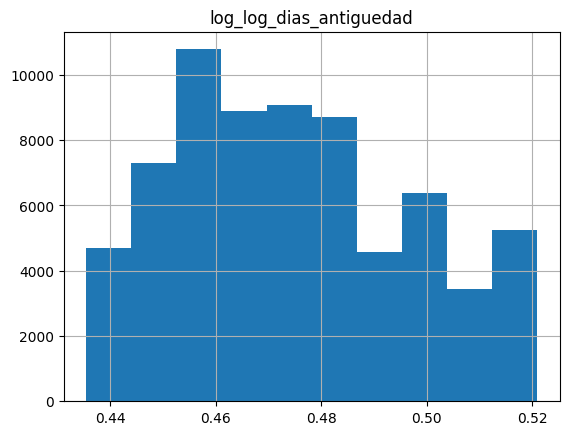

In [ ]:
for i in a_predict6.columns[-2:]:
  print(a_predict6.hist(i))

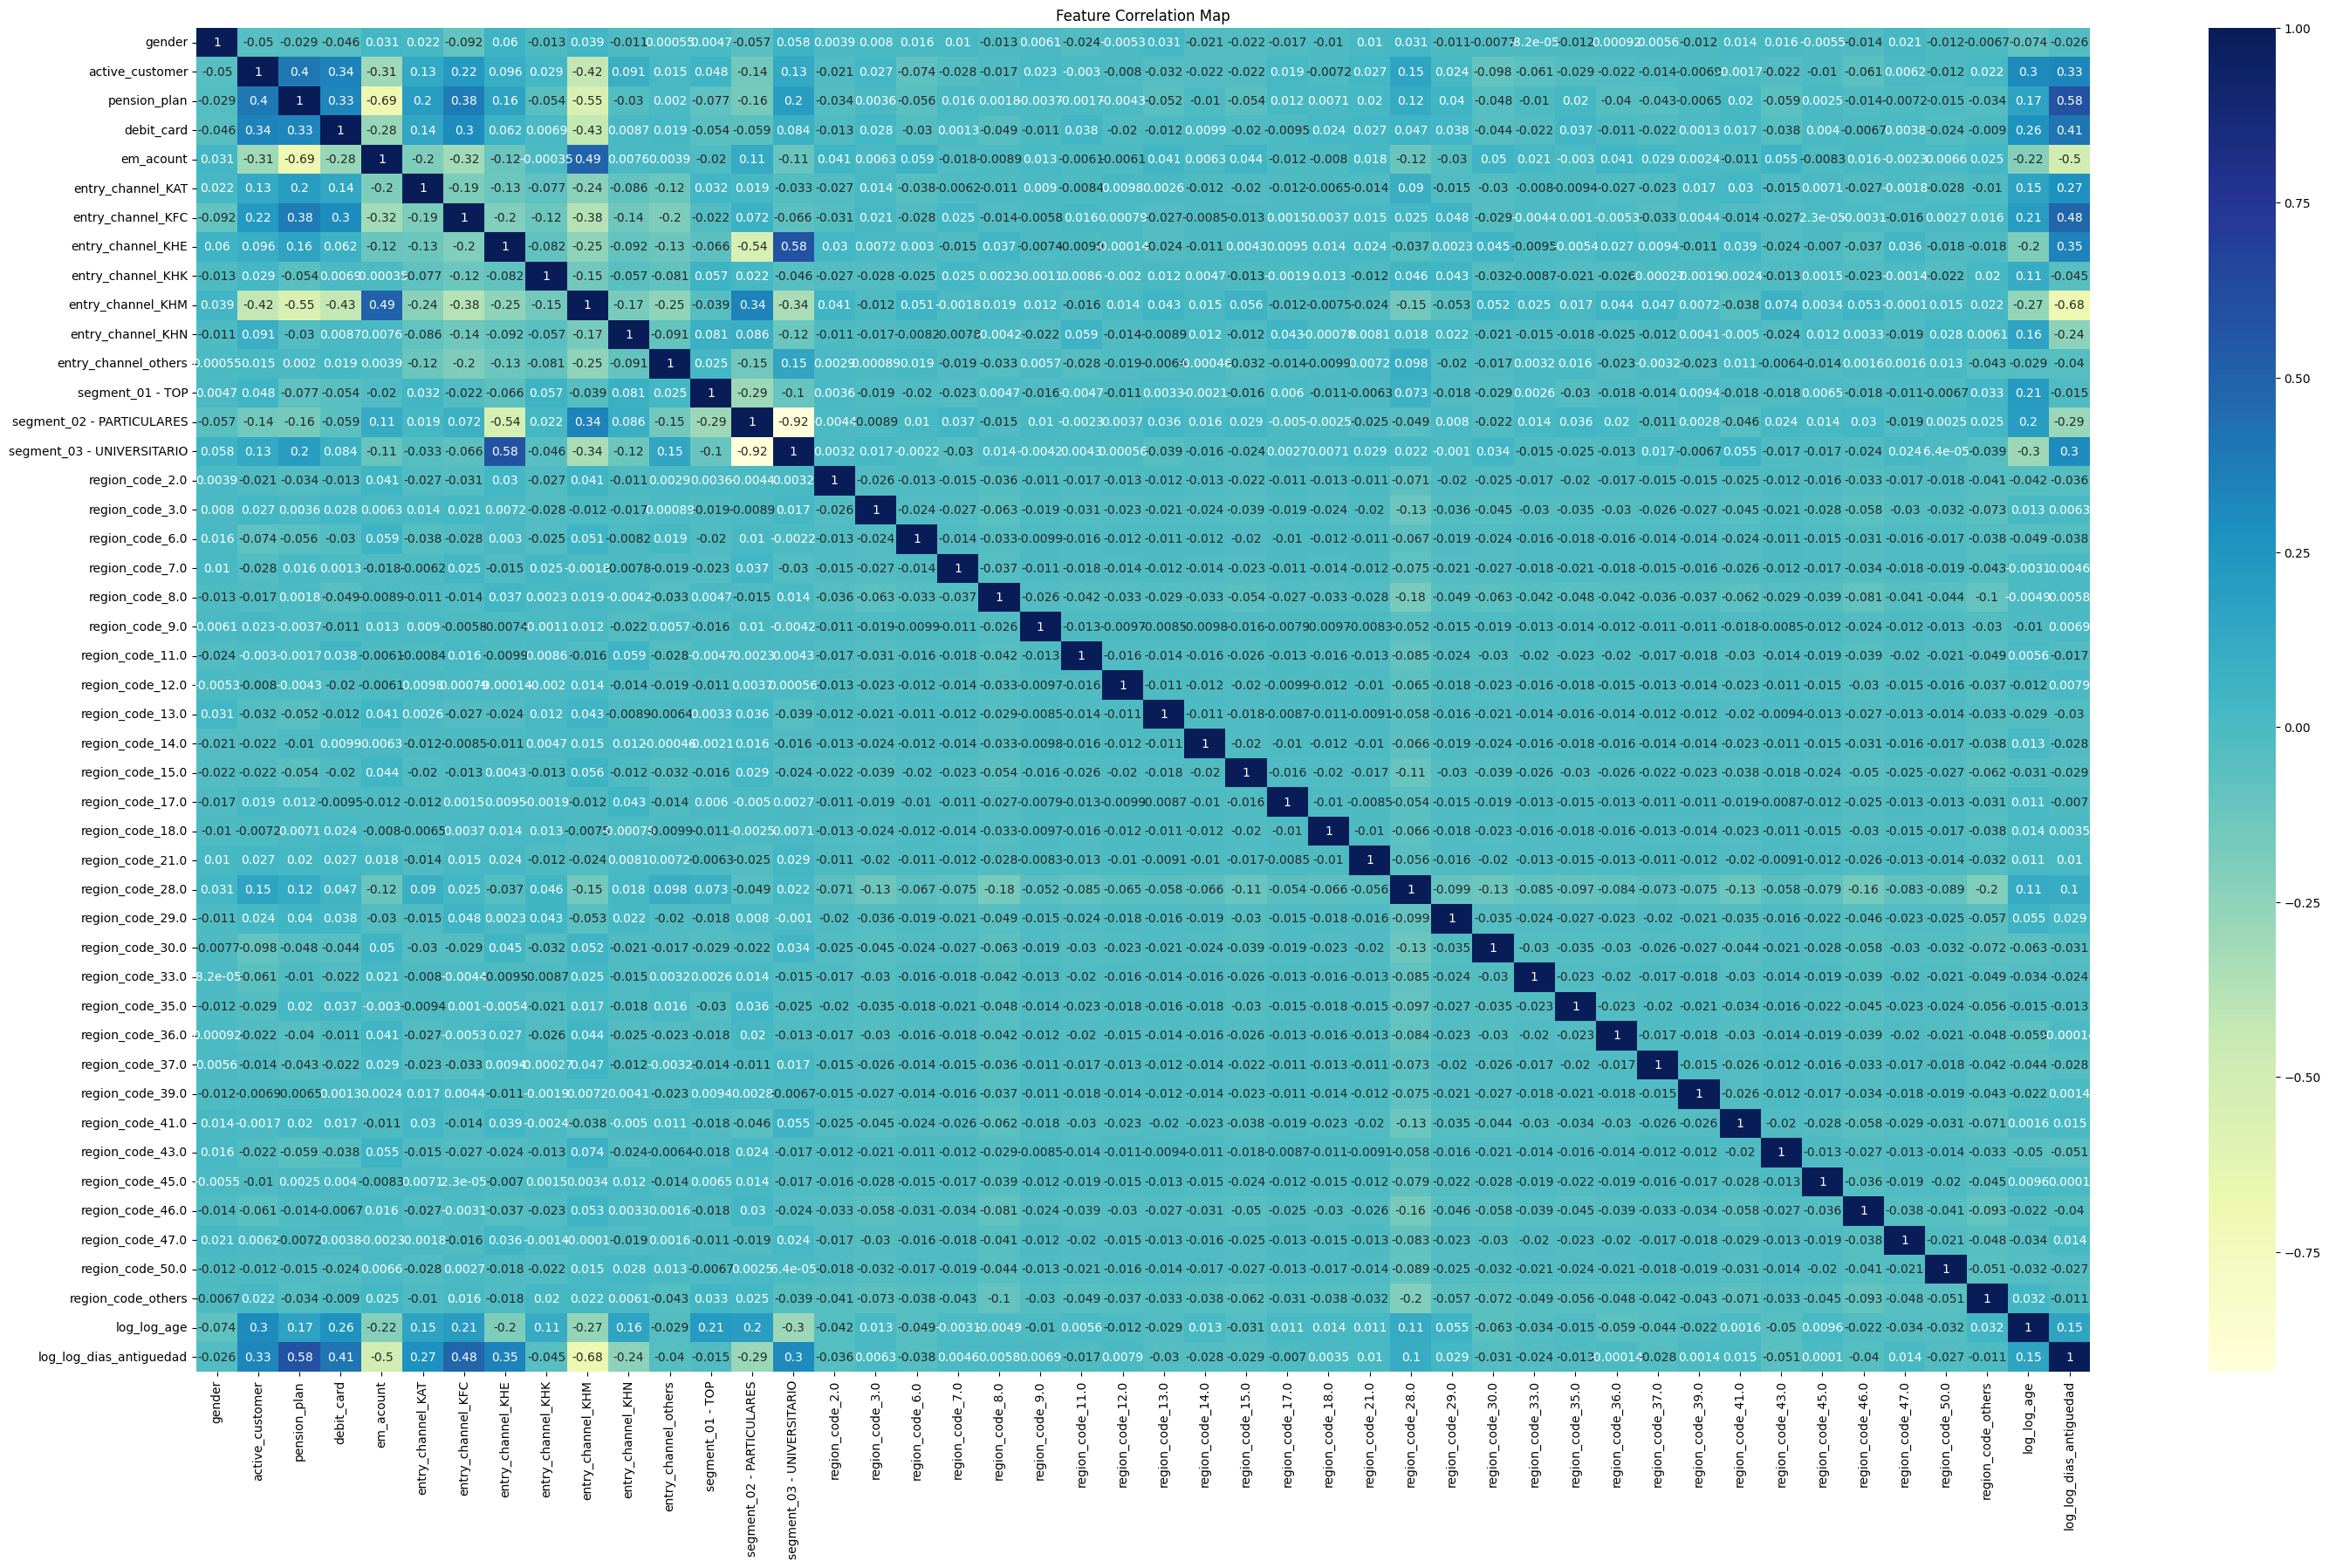

In [ ]:
plt.figure(figsize=(35,20))
sns.heatmap(df6.corr(),cmap="YlGnBu", annot=True);
plt.title("Feature Correlation Map");

In [ ]:
# diversas pruebas de eliminar distitas variables para ver como reacciona el modelo
#df6.drop(['entry_channel_KHE'], axis=1, inplace=True)
#a_predict6.drop([ 'entry_channel_KHE'], axis=1, inplace=True)



## 9. Preparación de los Datos para el Modelo

Separamos el dataset en características (X) y la variable objetivo (y), y dividimos los datos en conjuntos de entrenamiento y prueba.

In [ ]:
X = df6.drop("pension_plan",axis=1)
y = df6['pension_plan']
a_predict6= a_predict6.drop("pension_plan",axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      5718 non-null   bool   
 1   active_customer             5718 non-null   bool   
 2   debit_card                  5718 non-null   bool   
 3   em_acount                   5718 non-null   bool   
 4   entry_channel_KAT           5718 non-null   bool   
 5   entry_channel_KFC           5718 non-null   bool   
 6   entry_channel_KHE           5718 non-null   bool   
 7   entry_channel_KHK           5718 non-null   bool   
 8   entry_channel_KHM           5718 non-null   bool   
 9   entry_channel_KHN           5718 non-null   bool   
 10  entry_channel_others        5718 non-null   bool   
 11  segment_01 - TOP            5718 non-null   bool   
 12  segment_02 - PARTICULARES   5718 non-null   bool   
 13  segment_03 - UNIVERSITARIO  5718 

In [ ]:
y.value_counts()

pension_plan
False    3000
True     2718
Name: count, dtype: int64

### División del dataset en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

4002
1716


In [ ]:
y_train.value_counts()

pension_plan
False    2099
True     1903
Name: count, dtype: int64

### Estandarización de los datos

In [ ]:
scaler=StandardScaler()
X_train_escaler = scaler.fit_transform(X_train)
X_test_escaler = scaler.transform(X_test)
a_predict6_escaler = scaler.transform(a_predict6)

## 10. Entrenamiento y Evaluación de Modelos

Entrenamos y evaluamos varios modelos de clasificación, comparando sus métricas para seleccionar el más adecuado.

Modelo: Logistic Regression
Precisión en Entrenamiento: 0.8630684657671165
Precisión en Prueba: 0.865967365967366
AUC en Entrenamiento: 0.9389633779516657
AUC en Prueba: 0.9358102449221384


Modelo: Random Forest
Precisión en Entrenamiento: 0.9980009995002499
Precisión en Prueba: 0.8688811188811189
AUC en Entrenamiento: 0.9999670788857492
AUC en Prueba: 0.9376609493201147


Modelo: Gradient Boosting
Precisión en Entrenamiento: 0.8783108445777111
Precisión en Prueba: 0.8717948717948718
AUC en Entrenamiento: 0.9541567851167522
AUC en Prueba: 0.94488196482436


Modelo: KNN
Precisión en Entrenamiento: 0.8750624687656172
Precisión en Prueba: 0.8327505827505828
AUC en Entrenamiento: 0.9544809892456859
AUC en Prueba: 0.9033813826491357


Modelo: Naive Bayes
Precisión en Entrenamiento: 0.8053473263368316
Precisión en Prueba: 0.8047785547785548
AUC en Entrenamiento: 0.8813385349528353
AUC en Prueba: 0.8654092589692434


Modelo: XGBoost
Precisión en Entrenamiento: 0.8673163418290855
Precisión en

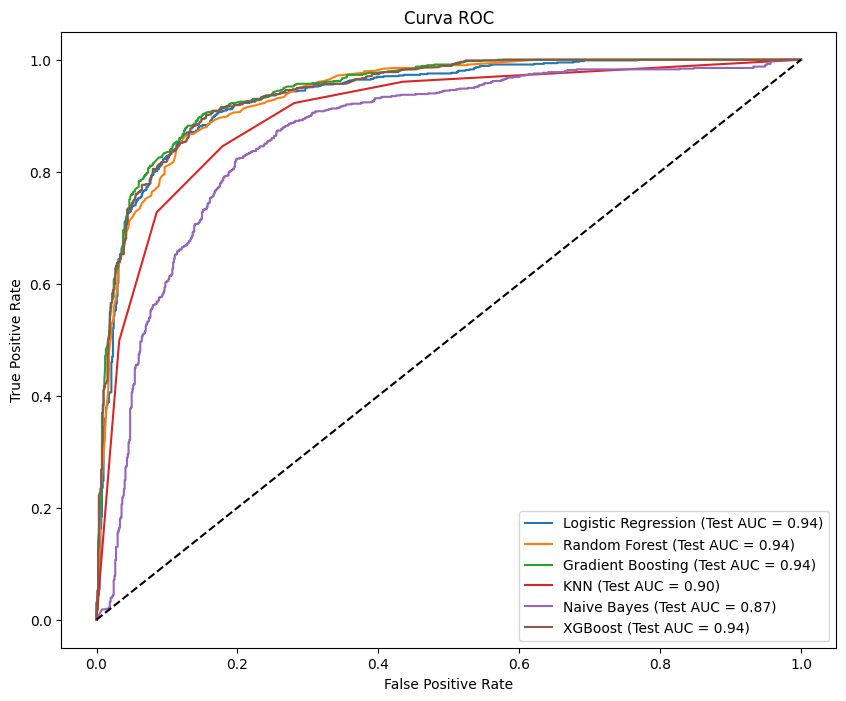

                 Model  Train Accuracy  Test Accuracy  Train AUC  Test AUC
0  Logistic Regression        0.863068       0.865967   0.938963  0.935810
1        Random Forest        0.998001       0.868881   0.999967  0.937661
2    Gradient Boosting        0.878311       0.871795   0.954157  0.944882
3                  KNN        0.875062       0.832751   0.954481  0.903381
4          Naive Bayes        0.805347       0.804779   0.881339  0.865409
5              XGBoost        0.867316       0.865385   0.947384  0.941893


In [ ]:
# Lista métricas
metrics = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Train AUC': [],
    'Test AUC': []
}

# ista de modelos a comparar
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0, n_estimators=200, learning_rate=0.05, max_depth=2),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.05, max_depth=2, alpha=10, n_estimators=200)
}

# Entrenar y evaluar modelos
for name, model in models.items():

    model.fit(X_train_escaler, y_train)

    y_train_proba = model.predict_proba(X_train_escaler)[:, 1]
    y_test_proba = model.predict_proba(X_test_escaler)[:, 1]
    y_train_pred = model.predict(X_train_escaler)
    y_test_pred = model.predict(X_test_escaler)

    # Calcular las métricas
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_auc = roc_auc_score(y_train, y_train_proba)
    test_auc = roc_auc_score(y_test, y_test_proba)

    # Almacenar las métricas
    metrics['Model'].append(name)
    metrics['Train Accuracy'].append(train_accuracy)
    metrics['Test Accuracy'].append(test_accuracy)
    metrics['Train AUC'].append(train_auc)
    metrics['Test AUC'].append(test_auc)

    print(f"Modelo: {name}")
    print("Precisión en Entrenamiento:", train_accuracy)
    print("Precisión en Prueba:", test_accuracy)
    print("AUC en Entrenamiento:", train_auc)
    print("AUC en Prueba:", test_auc)
    print("\n")

# Plotear la curva ROC para cada modelo
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Predecir las probabilidades y las etiquetas
    y_test_proba = model.predict_proba(X_test_escaler)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f'{name} (Test AUC = {roc_auc_score(y_test, y_test_proba):.2f})')

# Plotear la línea de referencia
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# visualizar las métricas
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


## 11. Modelo Final y Predicciones

Entrenamos el modelo seleccionado  Gradient Boosting debido a su Test AUC más alto (0.9449), lo que indica la mejor capacidad para distinguir entre clases en datos no vistos. También muestra un buen equilibrio entre Train Accuracy (0.8783) y Test Accuracy (0.8718), sugiriendo que generaliza bien sin sobreajustarse. En comparación con otros modelos, Gradient Boosting ofrece el mejor rendimiento global, por lo que lo utilizaremos para identificar clientes potenciales.

In [ ]:
gbc_final = GradientBoostingClassifier(random_state=0, n_estimators=200, learning_rate=0.05, max_depth=2)
gbc_final.fit(X_train_escaler, y_train)

y_pred = gbc_final.predict(X_test_escaler)

# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[795 106]
 [114 701]]


Ver peso de mis variables en modelo

                       Feature  Importance
3                    em_acount    0.706893
44     log_log_dias_antiguedad    0.170227
43                 log_log_age    0.036404
1              active_customer    0.031823
8            entry_channel_KHM    0.016982
2                   debit_card    0.014305
11            segment_01 - TOP    0.011711
13  segment_03 - UNIVERSITARIO    0.007152
10        entry_channel_others    0.001456
7            entry_channel_KHK    0.000868
9            entry_channel_KHN    0.000367
27            region_code_21.0    0.000343
38            region_code_45.0    0.000245
30            region_code_30.0    0.000231
23            region_code_14.0    0.000201
31            region_code_33.0    0.000190
5            entry_channel_KFC    0.000185
18             region_code_8.0    0.000138
0                       gender    0.000121
33            region_code_36.0    0.000059
32            region_code_35.0    0.000056
14             region_code_2.0    0.000043
4          

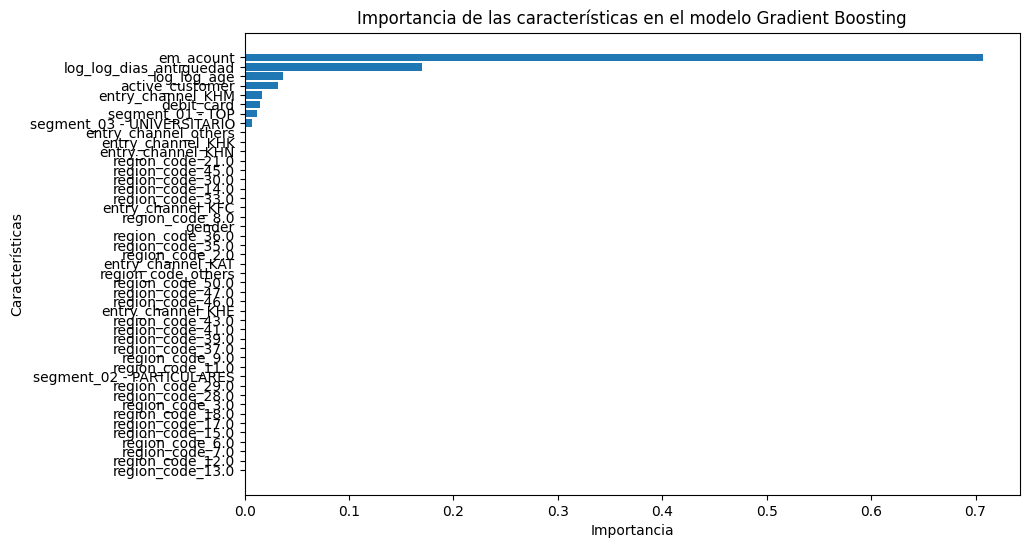

In [ ]:
# @title Asumiendo que ya tienes el modelo entrenado gbc_final

# Obtener la importancia de cada característica
importances = gbc_final.feature_importances_

feature_names = X_train.columns

# Crear un DataFrame para visualizar mejor
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Mostrar la tabla
print(feature_importances)

# gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características en el modelo Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()

## Validación cruzada

In [ ]:
# ACCURACY
cv_scores = cross_val_score(gbc_final, X_train_escaler, y_train, cv=5, scoring='accuracy')

print("Accuracy por cada fold:", cv_scores)
print("Accuracy promedio:", cv_scores.mean())
print("Desviación estándar del Accuracy:", cv_scores.std())

Accuracy por cada fold: [0.88514357 0.87765293 0.87375    0.87125    0.86375   ]
Accuracy promedio: 0.8743093008739077
Desviación estándar del Accuracy: 0.00706728030776245


In [ ]:
# AUC
cv_scores = cross_val_score(gbc_final, X_train_escaler, y_train, cv=5, scoring='roc_auc')

print("AUC por cada fold:", cv_scores)
print("AUC promedio:", cv_scores.mean())
print("Desviación estándar del AUC:", cv_scores.std())

AUC por cada fold: [0.95199663 0.95497125 0.94651996 0.94835213 0.94413534]
AUC promedio: 0.9491950616696089
Desviación estándar del AUC: 0.0038647290038293187


### Prediccion

In [ ]:
y_pred_final = gbc_final.predict_proba(a_predict6_escaler)
y_pred_final
# Obtener los valores únicos y sus conteos
#values, counts = np.unique(y_pred_final, return_counts=True)

# Mostrar los resultados
#for value, count in zip(values, counts):
#    print(f"Valor: {value}, Conteo: {count}")

array([[0.94788484, 0.05211516],
       [0.91361322, 0.08638678],
       [0.71078161, 0.28921839],
       ...,
       [0.77053587, 0.22946413],
       [0.86777796, 0.13222204],
       [0.86280948, 0.13719052]])

## 12. Guardado de Resultados

Finalmente, guardamos los resultados de los clientes potenciales en un archivo CSV para su posterior análisis o acción.

In [ ]:
potenciales = a_predict6.copy()

potenciales['potencial_pension_plan'] = [pred[1] for pred in y_pred_final]
potenciales = potenciales.sort_values(by='potencial_pension_plan', ascending=False)
potenciales


gender  active_customer  debit_card  em_acount  \
customer_id                                                   
1004478        True             True       False      False   
1027886        True             True        True      False   
1001642        True             True        True      False   
1006654       False             True       False      False   
1209862       False             True       False      False   
...             ...              ...         ...        ...   
1495690       False            False        True       True   
1477175       False            False        True       True   
1491281        True            False        True       True   
1458240       False            False        True       True   
1491963       False            False        True       True   

             entry_channel_KAT  entry_channel_KFC  entry_channel_KHE  \
customer_id                                                            
1004478                  False              False              False   
1027886                  False              False               True   
1001642                  False               True              False   
1006654                  False               True              False   
1209862                  False              False              False   
...                        ...                ...                ...   
1495690                  False              False              False   
1477175                  False              False              False   
1491281                  False              False              False   
1458240                  False              False              False   
1491963                  False              False              False   

             entry_channel_KHK  entry_channel_KHM  entry_channel_KHN  ...  \
customer_id                                                           ...   
1004478                  False              False              False  ...   
1027886                  False              False              False  ...   
1001642                  False              False              False  ...   
1006654                  False              False              False  ...   
1209862                  False              False               True  ...   
...                        ...                ...                ...  ...   
1495690                  False               True              False  ...   
1477175                  False               True              False  ...   
1491281                  False               True              False  ...   
1458240                  False               True              False  ...   
1491963                  False               True              False  ...   

             region_code_41.0  region_code_43.0  region_code_45.0  \
customer_id                                                         
1004478                 False             False             False   
1027886                 False             False             False   
1001642                 False             False             False   
1006654                 False             False             False   
1209862                 False             False             False   
...                       ...               ...               ...   
1495690                 False             False             False   
1477175                 False             False             False   
1491281                 False             False             False   
1458240                 False             False             False   
1491963                  True             False             False   

             region_code_46.0  region_code_47.0  region_code_50.0  \
customer_id                                                         
1004478                 False             False             False   
1027886                 False             False             False   
1001642                 False             False             False   
1006654    

### Obtener los ID de los 'n' clientes más potenciales de tabla customers




In [ ]:
n = 100
customers_potenciales_final=potenciales[:n].index
customers_potenciales_final

Index([1004478, 1027886, 1001642, 1006654, 1209862, 1118741, 1000468, 1003733,
       1001363, 1001241, 1001278, 1089828, 1000671, 1004767, 1006095, 1003588,
       1003397, 1004261, 1005931, 1006924, 1003630, 1004623, 1009709, 1258973,
       1139388,  509221, 1006295, 1004746, 1005882, 1011205, 1004806, 1007636,
       1010412, 1001478, 1001574, 1003906, 1001986, 1001865, 1001816, 1098437,
       1183161, 1061698, 1014355, 1229877, 1159165, 1010764, 1009342, 1007927,
       1010140, 1007755, 1203029, 1286397, 1206641, 1000899, 1026331, 1019052,
       1037535, 1011698, 1018679, 1013003, 1019247, 1012144, 1021600, 1219129,
       1008908, 1007176, 1040204, 1083862, 1083837, 1045153, 1124471, 1133868,
       1030194, 1014239, 1207924, 1234540, 1031892, 1261880, 1019231, 1012135,
       1011433, 1026317, 1011494, 1022059, 1036025, 1007155, 1007160, 1008420,
       1008283, 1027890, 1028938, 1029891, 1021992, 1025287, 1030722, 1035469,
       1031872,  931374, 1015657, 1017221],
      dt

In [ ]:
lista_potenciales=[]

for i in customers_potenciales_final:
  other_customer=customers[customers['customer_id']==i]

  other_customer['potencialidad'] = potenciales.loc[i, 'potencial_pension_plan']

  lista_potenciales.append(other_customer)

lista_potenciales=pd.concat(lista_potenciales)
lista_potenciales

<ipython-input-946-4b9a951e3ae0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_customer['potencialidad'] = potenciales.loc[i, 'potencial_pension_plan']
<ipython-input-946-4b9a951e3ae0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_customer['potencialidad'] = potenciales.loc[i, 'potencial_pension_plan']
<ipython-input-946-4b9a951e3ae0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

customer_id country_id  region_code gender  age    salary entry_date  \
2691       1004478         ES         28.0      H   28  24658.60    2019-02   
5288       1027886         ES         14.0      H   27  11591.42    2019-07   
2401       1001642         ES         35.0      H   28  16804.36    2019-01   
2952       1006654         ES         28.0      V   31       NaN    2019-02   
21352      1209862         ES         33.0      V   29  13408.22    2020-10   
...            ...        ...          ...    ...  ...       ...        ...   
5757       1035469         ES         12.0      H   27  18958.34    2019-07   
5559       1031872         ES         15.0      V   26  10789.55    2019-07   
2121        931374         ES         46.0      H   33       NaN    2019-07   
3941       1015657         ES         41.0      V   29  14823.04    2019-05   
4160       1017221         ES         28.0      H   29       NaN    2019-05   

      entry_channel  active_customer             segment  ...  em_account_pp  \
2691            KHC              1.0  03 - UNIVERSITARIO  ...              0   
5288            KHE              1.0  03 - UNIVERSITARIO  ...              0   
2401            KFC              1.0  03 - UNIVERSITARIO  ...              0   
2952            KFC              1.0  03 - UNIVERSITARIO  ...              0   
21352           KHN              1.0  03 - UNIVERSITARIO  ...              0   
...             ...              ...                 ...  ...            ...   
5757            KHE              1.0  03 - UNIVERSITARIO  ...              0   
5559            KHE              1.0  03 - UNIVERSITARIO  ...              0   
2121            KAZ              1.0   02 - PARTICULARES  ...              0   
3941            KFC              1.0   02 - PARTICULARES  ...              0   
4160            KFC              1.0   02 - PARTICULARES  ...              0   

       credit_card  payroll  pension_plan  payroll_account  emc_account  \
2691             1        0             0                1            0   
5288             0        0             0                0            0   
2401             0        0             0                0            1   
2952             0        0             0                0            1   
21352            0        0             0                0            0   
...            ...      ...           ...              ...          ...   
5757             0        0             0                1            0   
5559             0        0             0                1            0   
2121             1        0             0                0            0   
3941             0        0             0                1            0   
4160             0        0             0                0            0   

       debit_card  em_account_p  em_acount  potencialidad  
2691            0             0          0       0.975041  
5288            1             0          0       0.974711  
2401            1             0          0       0.973753  
2952            0             0          0       0.973535  
21352           0             0          0       0.973277  
...           ...           ...        ...            ...  
5757            1             0          0       0.968324  
5559            1             0          0       0.968324  
2121            0             0          0       0.968299  
3941            0             0          0       0.968289  
4160            0             0          0       0.968289  

[100 rows x 26 columns]

### Exportar DF

In [ ]:
pd.to_pickle(lista_potenciales,"/content/drive/MyDrive/Estudios/4.Master en Data Science /TFM/ML/potenciales.csv")



### Exportar CSV

In [ ]:
lista_potenciales.to_csv('potenciales_final.csv')

# Guardar modelo para API

In [ ]:
import pickle

# Guardar el scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [ ]:
# Guardar el modelo Gradient Boosting entrenado
pickle.dump(gbc_final, open("gradient_boosting_model.pkl", "wb"))

# streamlit web: https://ari-tfm-easy-money.streamlit.app/
# streamlit local: streamlit run app.py